# Machine Learning Engineer Nanodegree
## Capstone Project - 
Pedro Rosanes  
2017

## I. Definition
<!-- _(approx. 1-2 pages)_  -->

### Project Overview
<!-- In this section, look to provide a high-level overview of the project in layman’s terms. Questions to ask yourself when writing this section:
- _Has an overview of the project been provided, such as the problem domain, project origin, and related datasets or input data?_
- _Has enough background information been given so that an uninformed reader would understand the problem domain and following problem statement?_
-->

[Kaggle's](https://www.kaggle.com/c/walmart-recruiting-trip-type-classification) Walmart Recruiting: Trip Type Classification

Walmart uses both art and science to continually make progress on their core mission of better understanding and serving their customers. One way Walmart is able to improve customers' shopping experiences is by segmenting their store visits into different trip types. 

Whether they're on a last minute run for new puppy supplies or leisurely making their way through a weekly grocery list, classifying trip types enables Walmart to create the best shopping experience for every customer.

Currently, Walmart's trip types are created from a combination of existing customer insights ("art") and purchase history data ("science"). In this recruiting competition, Walmart is challenging Kagglers to focus on the (data) science and classify customer trips using only a transactional dataset of the items they've purchased. Improving the science behind trip type classification will help Walmart refine their segmentation process.

### Problem Statement
<!--
In this section, you will want to clearly define the problem that you are trying to solve, including the strategy (outline of tasks) you will use to achieve the desired solution. You should also thoroughly discuss what the intended solution will be for this problem. Questions to ask yourself when writing this section:
- _Is the problem statement clearly defined? Will the reader understand what you are expecting to solve?_
- _Have you thoroughly discussed how you will attempt to solve the problem?_
- _Is an anticipated solution clearly defined? Will the reader understand what results you are looking for?_
-->

The problem is to classify shopping trip types based on the items that customers purchased. To give a few hypothetical examples of trip types: a customer may make a small daily dinner trip, a weekly large grocery trip, a trip to buy gifts for an upcoming holiday, or a seasonal trip to buy clothes.

Walmart has categorized the trips contained in this data into 38 distinct types using a proprietary method applied to an extended set of data. The challange is to recreate this categorization/clustering with a more limited set of features. This could provide new and more robust ways to categorize trips.

#### Datasets and Inputs

The dataset is provided by Walmart in the [Kaggle competition](https://www.kaggle.com/c/walmart-recruiting-trip-type-classification/data). The set contains many different Trip informations, including information about the day it happened and information about the bought products. Each line of the CSV represents an bought item and some meta-information about the trip. Bellow you can find the detailed description of each information:
- *TripType* - a categorical id representing the type of shopping trip the customer made. This is the ground truth that you are predicting. TripType_999 is an "other" category.
- *VisitNumber* - an id corresponding to a single trip by a single customer
- *Weekday* - the weekday of the trip
- *Upc* - the UPC number of the product purchased
- *ScanCount* - the number of the given item that was purchased. A negative value indicates a product return.
- *DepartmentDescription* - a high-level description of the item's department
- *FinelineNumber* - a more refined category for each of the products, created by Walmart

#### Intended Solution

The intended solution for this problem is primarily the highest output of a probabilistic Multi-class SVM Classifier.

The main reasons for such a selection is due to the following facts:
- Since SVM uses the concept of largest margin of separtion, there is no possible local minima.
- The ability to choose different kernels give this algorithm a desired flexibility
- Stochastic Dradient Descent makes it a efficient algorithm to train
- Flexibility of parameters choice

#### Project Design

The first step of the project is to understand the data quantitatively. For that a counting of how many different classes, department descriptions and fineline numbers and products (UPCs) there are in the train set will be done. Also, there will be a description of the distribution of scan count. 

The input files must also be parsed to better fit the problem description. That is, each line of the file should be merged into a single data structure that represent a trip. That way, queries about a trip can be easily done. During that step, lines with missing data can also be handled, and new features created. For example, suppose a line of the input file misses values for Department, Fineline Number and Upc, that line can still be used to count the total amount of products for the trip. 

After the data is structured by trip and not by product purchase, I will be able to describe the distribution of department description and fineline numbers by trip, and check the correlation between each department and each fineline number.

For the next step, I will execute some unsupervised learning algorithms such as Gaussian Mixture Model and KMeans. K can be varied from the number of trip types defined in the train data to higher number, since there is a trip type with name "Others". Suggesting that in reallity there are more trip types then the ones provided by Walmart. Dimensionality reduction might also be used to better visualize the results.

After all the analyzes have been done, I'll train a Support Vector Machine with Stochastic Gradient Descent given the size of the data.


### Metrics
<!--
In this section, you will need to clearly define the metrics or calculations you will use to measure performance of a model or result in your project. These calculations and metrics should be justified based on the characteristics of the problem and problem domain. Questions to ask yourself when writing this section:
- _Are the metrics you’ve chosen to measure the performance of your models clearly discussed and defined?_
- _Have you provided reasonable justification for the metrics chosen based on the problem and solution?_
-->

A multi-class logarithmic loss function will be used to evaluate the model. The formula is:

$$-\frac{1}{N}\sum_{i=1}^N\sum_{j=1}^My_{ij}\log(p_{ij}),$$

where $N$ is the number of visits in the test set, $M$ is the number of trip types, log is the natural logarithm, $y_{ij}$ is 1 if observation $i$ is of class $j$ and 0 otherwise, and $p_{ij}$ is the predicted probability that observation $i$ belongs to class $j$.

In order to avoid the extremes of the log function, predicted probabilities are replaced with $max(min(p,1-10^{-15}),10^{-15})$.

#### Benchmark model

For the benchmark, I will use a random forest that has as feature only the amount of item of each Department Description. And compare the multi-class 
logarithmic loss value of this model with the proposed solution model.


## II. Analysis
_(approx. 2-4 pages)_

### Data Exploration
In this section, you will be expected to analyze the data you are using for the problem. This data can either be in the form of a dataset (or datasets), input data (or input files), or even an environment. The type of data should be thoroughly described and, if possible, have basic statistics and information presented (such as discussion of input features or defining characteristics about the input or environment). Any abnormalities or interesting qualities about the data that may need to be addressed have been identified (such as features that need to be transformed or the possibility of outliers). Questions to ask yourself when writing this section:
- _If a dataset is present for this problem, have you thoroughly discussed certain features about the dataset? Has a data sample been provided to the reader?_
- _If a dataset is present for this problem, are statistics about the dataset calculated and reported? Have any relevant results from this calculation been discussed?_
- _If a dataset is **not** present for this problem, has discussion been made about the input space or input data for your problem?_
- _Are there any abnormalities or characteristics about the input space or dataset that need to be addressed? (categorical variables, missing values, outliers, etc.)_



#### Load data

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [5]:
by_product = pd.read_csv('./data/train.csv.zip', compression='zip', sep=',', quotechar='"')

#### Basic analysis of raw input file

In [7]:
print "Columns of file:"
for column in by_product.columns:
    print "-" + column
    
print "\nUnique visits"
print len(by_product['VisitNumber'].unique())

print "\nUnique TripTypes"
print len(by_product['TripType'].unique())
    
print "\nUnique DepartmentDescription"
departments = by_product['DepartmentDescription'].dropna().unique()
print len(departments)

print "\nUnique FinelineNumber"
fineline_numbers = by_product['FinelineNumber'].unique()
print len(fineline_numbers)

print "\nUnique products (Upc)"
upcs = by_product['Upc'].unique()
print len(upcs)

Columns of file:
-TripType
-VisitNumber
-Weekday
-Upc
-ScanCount
-DepartmentDescription
-FinelineNumber

Unique visits
95674

Unique TripTypes
38

Unique DepartmentDescription
68

Unique FinelineNumber
5196

Unique products (Upc)
97715


Analyzing the columns, we can see that the number of bought products from a given department will provide 68 different features. For now, I consider that a good amount of features. If later the model is limited by lack of model complexity, I can use FinelineNumber as another feature.

#### Agreggate by visit

In [3]:
from IPython.display import clear_output

by_visit_columns = np.concatenate((np.array(['VisitNumber', 'TripType', 'Weekday']), departments), axis=0)
by_visit = pd.DataFrame(data=np.zeros((0,len(by_visit_columns))), columns=by_visit_columns)
i = 0
import math
for name, groups in by_product.groupby('VisitNumber'):
    a_visit = pd.DataFrame(data=np.zeros((1,len(by_visit_columns))), columns=by_visit_columns)
    a_visit.loc[0]['VisitNumber'] = name
    a_visit.name = i
    
    for _, group in groups.iterrows():
        if type(group['DepartmentDescription']) == str and not np.isnan(group['ScanCount']):
            a_visit.loc[0][group['DepartmentDescription']] += group['ScanCount']
        a_visit.loc[0]['TripType'] = group['TripType']
        a_visit.loc[0]['Weekday'] = group['Weekday']
    by_visit = by_visit.append(a_visit)
    i += 1
    if i % 100 == 0:
        print "Progress..."
        clear_output()
        print i
        print name
print "Loaded"

95600
191184


In [4]:
by_visit.to_csv('./data/by_visit.csv', index=False, sep=',', quotechar='"')

In [2]:
by_visit = pd.read_csv('./data/by_visit.csv', sep=',', quotechar='"')

In [3]:
by_visit.head()

,VisitNumber,TripType,Weekday,FINANCIAL SERVICES,SHOES,PERSONAL CARE,PAINT AND ACCESSORIES,DSD GROCERY,MEAT - FRESH & FROZEN,DAIRY,...,SWIMWEAR/OUTERWEAR,OTHER DEPARTMENTS,MEDIA AND GAMING,FURNITURE,OPTICAL - LENSES,SEASONAL,LARGE HOUSEHOLD GOODS,1-HR PHOTO,CONCEPT STORES,HEALTH AND BEAUTY AIDS
0,5.0,999.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.0,30.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8.0,26.0,0.0,0.0,0.0,0.0,18.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10.0,8.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Description of data by trip type

Departments are ordered by descending mean values.

In [47]:
from IPython.core.display import display, HTML

for trip_type, group in by_visit.groupby('TripType'):
    print "TripType: {}".format(trip_type)
    display(HTML(
        group.describe().drop(['VisitNumber', 'TripType', 'Weekday'], axis=1)
             .sort_values('mean', axis=1, ascending=False)
             .to_html()
    ))


TripType: 3.0


,FINANCIAL SERVICES,IMPULSE MERCHANDISE,LARGE HOUSEHOLD GOODS,DSD GROCERY,PHARMACY OTC,PERSONAL CARE,MENS WEAR,"CANDY, TOBACCO, COOKIES",BEAUTY,AUTOMOTIVE,PRODUCE,CELEBRATION,HOME MANAGEMENT,SPORTING GOODS,ELECTRONICS,SERVICE DELI,GROCERY DRY GOODS,OFFICE SUPPLIES,HARDWARE,INFANT CONSUMABLE HARDLINES,DAIRY,PETS AND SUPPLIES,"LIQUOR,WINE,BEER",COOK AND DINE,MEDIA AND GAMING,LAWN AND GARDEN,BOYS WEAR,BATH AND SHOWER,FABRICS AND CRAFTS,JEWELRY AND SUNGLASSES,FROZEN FOODS,TOYS,SHOES,HOUSEHOLD CHEMICALS/SUPP,BAKERY,CAMERAS AND SUPPLIES,HOUSEHOLD PAPER GOODS,BEDDING,BOOKS AND MAGAZINES,LADIESWEAR,PAINT AND ACCESSORIES,COMM BREAD,WIRELESS,MENSWEAR,ACCESSORIES,SLEEPWEAR/FOUNDATIONS,CONCEPT STORES,1-HR PHOTO,"GIRLS WEAR, 4-6X AND 7-14",INFANT APPAREL,HOME DECOR,SWIMWEAR/OUTERWEAR,PLUS AND MATERNITY,FURNITURE,MEAT - FRESH & FROZEN,PLAYERS AND ELECTRONICS,OPTICAL - FRAMES,OPTICAL - LENSES,SEASONAL,OTHER DEPARTMENTS,Unnamed: 0,PHARMACY RX,BRAS & SHAPEWEAR,LADIES SOCKS,HORTICULTURE AND ACCESS,SHEER HOSIERY,SEAFOOD,PRE PACKED DELI,HEALTH AND BEAUTY AIDS
count,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.000000,3643.0,3643.0,3643.0,3643.0,3643.0,3643.0,3643.0,3643.0,3643.0,3643.0,3643.0,3643.0
mean,1.600055,0.219874,0.020862,0.015372,0.012901,0.011254,0.009607,0.006862,0.006588,0.006039,0.005764,0.004666,0.004392,0.004392,0.003843,0.003568,0.003294,0.003294,0.003019,0.003019,0.003019,0.003019,0.002745,0.002745,0.002745,0.002470,0.002470,0.002196,0.002196,0.002196,0.001921,0.001647,0.001647,0.001372,0.001372,0.001372,0.001372,0.001098,0.001098,0.001098,0.001098,0.001098,0.000823,0.000823,0.000549,0.000549,0.000549,0.000549,0.000549,0.000549,0.000549,0.000549,0.000274,0.000274,0.000274,0.000274,0.000274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.116286,0.500653,0.142942,0.131668,0.135018,0.124596,0.115593,0.085828,0.112192,0.093541,0.085909,0.075791,0.114718,0.077597,0.077626,0.068228,0.066199,0.066199,0.064105,0.072165,0.064105,0.072165,0.066224,0.057335,0.057335,0.054902,0.059694,0.052354,0.057359,0.046816,0.043799,0.061978,0.040555,0.043819,0.037027,0.037027,0.043819,0.033122,0.033122,0.040574,0.040574,0.033122,0.028689,0.037043,0.023427,0.023427,0.023427,0.023427,0.023427,0.033136,0.023427,0.033136,0.016568,0.016568,0.016568,0.016568,0.016568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

TripType: 4.0


,PHARMACY OTC,DSD GROCERY,IMPULSE MERCHANDISE,PRODUCE,PERSONAL CARE,GROCERY DRY GOODS,HOUSEHOLD PAPER GOODS,BAKERY,DAIRY,"CANDY, TOBACCO, COOKIES",COMM BREAD,SERVICE DELI,BEAUTY,FROZEN FOODS,HOUSEHOLD CHEMICALS/SUPP,FINANCIAL SERVICES,PHARMACY RX,HORTICULTURE AND ACCESS,HOME MANAGEMENT,CELEBRATION,MENS WEAR,OFFICE SUPPLIES,AUTOMOTIVE,PAINT AND ACCESSORIES,SPORTING GOODS,PETS AND SUPPLIES,PRE PACKED DELI,HOME DECOR,TOYS,HARDWARE,SHOES,"GIRLS WEAR, 4-6X AND 7-14",MEAT - FRESH & FROZEN,COOK AND DINE,ACCESSORIES,JEWELRY AND SUNGLASSES,MENSWEAR,PLAYERS AND ELECTRONICS,SWIMWEAR/OUTERWEAR,OPTICAL - FRAMES,Unnamed: 0,OTHER DEPARTMENTS,MEDIA AND GAMING,FURNITURE,OPTICAL - LENSES,SEASONAL,SLEEPWEAR/FOUNDATIONS,LARGE HOUSEHOLD GOODS,1-HR PHOTO,CONCEPT STORES,CAMERAS AND SUPPLIES,BOOKS AND MAGAZINES,"LIQUOR,WINE,BEER",SHEER HOSIERY,BOYS WEAR,FABRICS AND CRAFTS,INFANT CONSUMABLE HARDLINES,LADIESWEAR,SEAFOOD,LAWN AND GARDEN,WIRELESS,BRAS & SHAPEWEAR,BEDDING,BATH AND SHOWER,INFANT APPAREL,LADIES SOCKS,PLUS AND MATERNITY,ELECTRONICS,HEALTH AND BEAUTY AIDS
count,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.00000,346.00000,346.00000,346.00000,346.00000,346.00000,346.00000,346.0,346.0,346.0,346.0,346.0,346.0,346.0,346.0,346.0,346.0,346.0,346.0,346.0,346.0,346.0,346.0,346.0,346.0,346.0,346.0,346.0,346.0,346.0,346.0,346.0,346.0,346.0,346.0,346.0,346.0,346.0,346.0,346.0
mean,1.933526,0.251445,0.144509,0.106936,0.089595,0.069364,0.052023,0.043353,0.034682,0.028902,0.026012,0.026012,0.020231,0.020231,0.014451,0.014451,0.011561,0.011561,0.011561,0.008671,0.008671,0.008671,0.008671,0.005780,0.005780,0.005780,0.005780,0.005780,0.005780,0.00289,0.00289,0.00289,0.00289,0.00289,0.00289,0.00289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.268544,0.893007,0.535073,0.399432,0.349835,0.418192,0.327766,0.254523,0.238253,0.293460,0.192361,0.256881,0.140994,0.233799,0.160865,0.119513,0.131367,0.131367,0.131367,0.092845,0.120072,0.120072,0.092845,0.107521,0.075918,0.075918,0.075918,0.107521,0.107521,0.05376,0.05376,0.05376,0.05376,0.05376,0.05376,0.05376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

TripType: 5.0


,PHARMACY OTC,PHARMACY RX,PERSONAL CARE,DSD GROCERY,IMPULSE MERCHANDISE,GROCERY DRY GOODS,OPTICAL - FRAMES,PRODUCE,DAIRY,BEAUTY,"CANDY, TOBACCO, COOKIES",HOUSEHOLD CHEMICALS/SUPP,FROZEN FOODS,HOUSEHOLD PAPER GOODS,PETS AND SUPPLIES,COMM BREAD,OFFICE SUPPLIES,SERVICE DELI,OPTICAL - LENSES,CELEBRATION,BAKERY,MENS WEAR,LAWN AND GARDEN,FABRICS AND CRAFTS,HOME MANAGEMENT,COOK AND DINE,FINANCIAL SERVICES,HARDWARE,AUTOMOTIVE,SHOES,"LIQUOR,WINE,BEER",SPORTING GOODS,HOME DECOR,LADIESWEAR,INFANT CONSUMABLE HARDLINES,BATH AND SHOWER,PRE PACKED DELI,JEWELRY AND SUNGLASSES,TOYS,HORTICULTURE AND ACCESS,MEAT - FRESH & FROZEN,LADIES SOCKS,ACCESSORIES,ELECTRONICS,SLEEPWEAR/FOUNDATIONS,BOOKS AND MAGAZINES,BOYS WEAR,"GIRLS WEAR, 4-6X AND 7-14",MEDIA AND GAMING,PAINT AND ACCESSORIES,INFANT APPAREL,BRAS & SHAPEWEAR,BEDDING,WIRELESS,SHEER HOSIERY,SEAFOOD,CAMERAS AND SUPPLIES,MENSWEAR,PLUS AND MATERNITY,1-HR PHOTO,SEASONAL,CONCEPT STORES,LARGE HOUSEHOLD GOODS,Unnamed: 0,FURNITURE,OTHER DEPARTMENTS,SWIMWEAR/OUTERWEAR,PLAYERS AND ELECTRONICS,HEALTH AND BEAUTY AIDS
count,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.00000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.00000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.0,4593.0,4593.0,4593.0,4593.0,4593.0,4593.0,4593.0
mean,1.365556,0.593730,0.224472,0.156107,0.126061,0.104507,0.104289,0.097104,0.059656,0.053560,0.033312,0.032876,0.028522,0.028086,0.025038,0.024385,0.023296,0.023079,0.018942,0.018942,0.01720,0.016982,0.016765,0.016547,0.014587,0.014587,0.010886,0.009798,0.009798,0.008709,0.008491,0.008273,0.007838,0.007620,0.007185,0.006096,0.005661,0.005225,0.004790,0.003919,0.003701,0.003484,0.003484,0.003484,0.003266,0.003266,0.003266,0.002830,0.002613,0.002177,0.00196,0.001960,0.001524,0.001524,0.001306,0.000653,0.000435,0.000218,0.000218,0.000218,0.000218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.018923,1.085008,0.795179,0.641392,0.506063,0.623620,0.501966,0.470999,0.427102,0.325601,0.319210,0.296626,0.272611,0.252762,0.385981,0.231111,0.286342,0.223584,0.170412,0.245762,0.17313,0.227026,0.194496,0.308398,0.169560,0.194671,0.103778,0.122189,0.137295,0.119570,0.149527,0.115902,0.130095,0.130942,0.125879,0.114145,0.085861,0.077912,0.108336,0.110362,0.064218,0.078009,0.118005,0.062512,0.067546,0.060757,0.067546,0.096727,0.062554,0.051073,0.05712,0.060813,0.048920,0.044245,0.041719,0.025552,0.020865,0.014755,0.014755,0.014755,0.014755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

TripType: 6.0


,"LIQUOR,WINE,BEER","CANDY, TOBACCO, COOKIES",DSD GROCERY,IMPULSE MERCHANDISE,GROCERY DRY GOODS,PRODUCE,FROZEN FOODS,DAIRY,PERSONAL CARE,HOUSEHOLD PAPER GOODS,HOUSEHOLD CHEMICALS/SUPP,SERVICE DELI,PHARMACY OTC,COMM BREAD,PETS AND SUPPLIES,CELEBRATION,PRE PACKED DELI,MEAT - FRESH & FROZEN,BAKERY,BEAUTY,LAWN AND GARDEN,OFFICE SUPPLIES,HOME MANAGEMENT,COOK AND DINE,FINANCIAL SERVICES,LADIESWEAR,FABRICS AND CRAFTS,SHOES,SPORTING GOODS,MENS WEAR,HARDWARE,BATH AND SHOWER,1-HR PHOTO,HORTICULTURE AND ACCESS,HOME DECOR,AUTOMOTIVE,SEAFOOD,SLEEPWEAR/FOUNDATIONS,PAINT AND ACCESSORIES,TOYS,BEDDING,MEDIA AND GAMING,INFANT CONSUMABLE HARDLINES,INFANT APPAREL,BOOKS AND MAGAZINES,ACCESSORIES,JEWELRY AND SUNGLASSES,WIRELESS,SEASONAL,"GIRLS WEAR, 4-6X AND 7-14",BOYS WEAR,OTHER DEPARTMENTS,CONCEPT STORES,LARGE HOUSEHOLD GOODS,OPTICAL - LENSES,OPTICAL - FRAMES,FURNITURE,SWIMWEAR/OUTERWEAR,Unnamed: 0,MENSWEAR,PHARMACY RX,PLAYERS AND ELECTRONICS,CAMERAS AND SUPPLIES,BRAS & SHAPEWEAR,ELECTRONICS,PLUS AND MATERNITY,LADIES SOCKS,SHEER HOSIERY,HEALTH AND BEAUTY AIDS
count,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.00000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.0,1277.0,1277.0,1277.0,1277.0,1277.0,1277.0,1277.0,1277.0,1277.0,1277.0,1277.0,1277.0,1277.0,1277.0,1277.0,1277.0
mean,0.953798,0.631950,0.335161,0.194205,0.146437,0.112764,0.079875,0.073610,0.055599,0.048551,0.046202,0.044636,0.041504,0.032106,0.029757,0.027408,0.021926,0.02036,0.019577,0.018011,0.014096,0.014096,0.011746,0.011746,0.011746,0.009397,0.008614,0.008614,0.007831,0.007048,0.006265,0.004699,0.003915,0.003915,0.003915,0.003915,0.003132,0.003132,0.003132,0.002349,0.002349,0.002349,0.002349,0.001566,0.001566,0.001566,0.001566,0.000783,0.000783,0.000783,0.000783,0.000783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.386306,1.066377,1.181941,0.576334,0.742579,0.499029,0.563974,0.334861,0.310542,0.267037,0.291298,0.291542,0.269680,0.293188,0.568828,0.253565,0.180095,0.19288,0.178180,0.138809,0.189344,0.197449,0.160387,0.133742,0.150297,0.136823,0.170066,0.092447,0.104453,0.092580,0.088305,0.079041,0.139918,0.092765,0.073963,0.073963,0.055901,0.055901,0.111935,0.048431,0.062554,0.048431,0.062554,0.055967,0.039559,0.055967,0.039559,0.027984,0.027984,0.027984,0.027984,0.027984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1.000000,0.000000,0.000000,0.000000

TripType: 7.0


,GROCERY DRY GOODS,SERVICE DELI,PRODUCE,FROZEN FOODS,DSD GROCERY,MEAT - FRESH & FROZEN,COMM BREAD,DAIRY,BAKERY,PRE PACKED DELI,IMPULSE MERCHANDISE,SEAFOOD,HOUSEHOLD PAPER GOODS,HOUSEHOLD CHEMICALS/SUPP,PERSONAL CARE,PHARMACY OTC,"CANDY, TOBACCO, COOKIES","LIQUOR,WINE,BEER",BEAUTY,PETS AND SUPPLIES,COOK AND DINE,FINANCIAL SERVICES,LAWN AND GARDEN,INFANT CONSUMABLE HARDLINES,CELEBRATION,OFFICE SUPPLIES,MENS WEAR,HARDWARE,AUTOMOTIVE,FABRICS AND CRAFTS,SPORTING GOODS,HOME MANAGEMENT,LADIESWEAR,SHOES,HOME DECOR,TOYS,PAINT AND ACCESSORIES,BOOKS AND MAGAZINES,ELECTRONICS,JEWELRY AND SUNGLASSES,HORTICULTURE AND ACCESS,"GIRLS WEAR, 4-6X AND 7-14",WIRELESS,ACCESSORIES,SLEEPWEAR/FOUNDATIONS,BEDDING,BOYS WEAR,BATH AND SHOWER,MEDIA AND GAMING,INFANT APPAREL,SHEER HOSIERY,LADIES SOCKS,PLAYERS AND ELECTRONICS,OPTICAL - FRAMES,SWIMWEAR/OUTERWEAR,BRAS & SHAPEWEAR,PLUS AND MATERNITY,PHARMACY RX,1-HR PHOTO,OTHER DEPARTMENTS,FURNITURE,CONCEPT STORES,SEASONAL,LARGE HOUSEHOLD GOODS,Unnamed: 0,OPTICAL - LENSES,MENSWEAR,CAMERAS AND SUPPLIES,HEALTH AND BEAUTY AIDS
count,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.00000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5752.0,5752.0,5752.0,5752.0,5752.0,5752.0,5752.0,5752.0
mean,0.772601,0.687761,0.551287,0.507997,0.405076,0.312761,0.287726,0.244611,0.198887,0.179937,0.116134,0.074235,0.046419,0.039465,0.037378,0.028860,0.026426,0.015299,0.013734,0.011996,0.011474,0.01130,0.010083,0.009214,0.009040,0.007823,0.007476,0.006259,0.006259,0.005737,0.005563,0.005389,0.005216,0.005042,0.004868,0.003129,0.002955,0.002608,0.002260,0.002086,0.002086,0.002086,0.001912,0.001565,0.001391,0.001043,0.001043,0.000869,0.000869,0.000869,0.000695,0.000522,0.000522,0.000522,0.000522,0.000348,0.000348,0.000348,0.000174,0.000174,0.000174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.789504,1.010914,1.179792,1.456590,0.874708,0.791445,0.751838,0.695870,0.670370,0.705786,0.444136,0.537791,0.267853,0.246005,0.253291,0.219549,0.191082,0.174268,0.159286,0.274764,0.160009,0.10571,0.132794,0.144758,0.140502,0.119879,0.093873,0.096698,0.105306,0.121438,0.101990,0.104525,0.094946,0.077849,0.089302,0.064524,0.080156,0.051004,0.051021,0.064567,0.061815,0.096878,0.054336,0.039528,0.041676,0.037282,0.037282,0.029473,0.034877,0.043726,0.032293,0.022834,0.022834,0.022834,0.022834,0.018645,0.026371,0.018645,0.013185,0.013185,0.013185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

TripType: 8.0


,DSD GROCERY,PERSONAL CARE,IMPULSE MERCHANDISE,PRODUCE,DAIRY,GROCERY DRY GOODS,BEAUTY,HOUSEHOLD CHEMICALS/SUPP,HOUSEHOLD PAPER GOODS,PHARMACY OTC,"CANDY, TOBACCO, COOKIES",PETS AND SUPPLIES,COMM BREAD,BAKERY,FROZEN FOODS,INFANT CONSUMABLE HARDLINES,SERVICE DELI,CELEBRATION,OFFICE SUPPLIES,PRE PACKED DELI,AUTOMOTIVE,HOME MANAGEMENT,HARDWARE,SHOES,"LIQUOR,WINE,BEER",COOK AND DINE,FABRICS AND CRAFTS,LADIESWEAR,SPORTING GOODS,BATH AND SHOWER,MEAT - FRESH & FROZEN,TOYS,JEWELRY AND SUNGLASSES,MENS WEAR,LAWN AND GARDEN,PAINT AND ACCESSORIES,HOME DECOR,BOOKS AND MAGAZINES,INFANT APPAREL,"GIRLS WEAR, 4-6X AND 7-14",BOYS WEAR,HORTICULTURE AND ACCESS,SWIMWEAR/OUTERWEAR,SLEEPWEAR/FOUNDATIONS,PHARMACY RX,ELECTRONICS,ACCESSORIES,MEDIA AND GAMING,BRAS & SHAPEWEAR,BEDDING,LADIES SOCKS,WIRELESS,OPTICAL - FRAMES,SHEER HOSIERY,PLUS AND MATERNITY,SEAFOOD,PLAYERS AND ELECTRONICS,MENSWEAR,1-HR PHOTO,OPTICAL - LENSES,CONCEPT STORES,LARGE HOUSEHOLD GOODS,SEASONAL,Unnamed: 0,FURNITURE,OTHER DEPARTMENTS,CAMERAS AND SUPPLIES,FINANCIAL SERVICES,HEALTH AND BEAUTY AIDS
count,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.0,12161.0,12161.0,12161.0,12161.0,12161.0,12161.0,12161.0,12161.0,12161.0,12161.0
mean,0.412219,0.222926,0.210262,0.162569,0.155579,0.135433,0.092262,0.083792,0.058959,0.052463,0.051558,0.046460,0.040704,0.040128,0.036921,0.032728,0.017104,0.008059,0.006661,0.005263,0.004852,0.004523,0.003783,0.003783,0.003783,0.003618,0.003125,0.002878,0.002467,0.002302,0.002056,0.002056,0.001974,0.001891,0.001727,0.001480,0.001316,0.001233,0.001151,0.001151,0.000987,0.000905,0.000740,0.000740,0.000658,0.000576,0.000493,0.000411,0.000329,0.000329,0.000329,0.000329,0.000247,0.000247,0.000164,0.000164,0.000082,0.000082,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.674277,0.560240,0.499454,0.498155,0.456824,0.440912,0.385007,0.361104,0.280496,0.255616,0.275757,0.269739,0.227409,0.223316,0.219603,0.230306,0.132176,0.097337,0.086251,0.081950,0.077329,0.072972,0.064012,0.068960,0.065284,0.062724,0.055814,0.118550,0.051240,0.049617,0.048792,0.048792,0.044382,0.043450,0.048805,0.040528,0.036250,0.035100,0.042519,0.040539,0.033917,0.032684,0.045336,0.027195,0.025641,0.023986,0.022208,0.020274,0.022211,0.018134,0.018134,0.022211,0.015705,0.015705,0.012824,0.012824,0.009068,0.009068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

TripType: 9.0


,MENS WEAR,IMPULSE MERCHANDISE,AUTOMOTIVE,OFFICE SUPPLIES,CELEBRATION,SPORTING GOODS,LADIESWEAR,HARDWARE,SHOES,TOYS,DSD GROCERY,ELECTRONICS,HOME MANAGEMENT,LAWN AND GARDEN,JEWELRY AND SUNGLASSES,COOK AND DINE,FABRICS AND CRAFTS,PERSONAL CARE,BOYS WEAR,WIRELESS,HOME DECOR,MEDIA AND GAMING,HORTICULTURE AND ACCESS,PHARMACY OTC,PAINT AND ACCESSORIES,BATH AND SHOWER,INFANT CONSUMABLE HARDLINES,PRODUCE,INFANT APPAREL,ACCESSORIES,"GIRLS WEAR, 4-6X AND 7-14",SLEEPWEAR/FOUNDATIONS,BRAS & SHAPEWEAR,BEAUTY,DAIRY,BEDDING,GROCERY DRY GOODS,"CANDY, TOBACCO, COOKIES",HOUSEHOLD CHEMICALS/SUPP,BOOKS AND MAGAZINES,PLAYERS AND ELECTRONICS,1-HR PHOTO,HOUSEHOLD PAPER GOODS,SERVICE DELI,CAMERAS AND SUPPLIES,BAKERY,LADIES SOCKS,FINANCIAL SERVICES,SHEER HOSIERY,COMM BREAD,SWIMWEAR/OUTERWEAR,FROZEN FOODS,MENSWEAR,PETS AND SUPPLIES,PLUS AND MATERNITY,FURNITURE,PRE PACKED DELI,"LIQUOR,WINE,BEER",MEAT - FRESH & FROZEN,PHARMACY RX,OPTICAL - FRAMES,OTHER DEPARTMENTS,SEASONAL,CONCEPT STORES,LARGE HOUSEHOLD GOODS,Unnamed: 0,OPTICAL - LENSES,SEAFOOD,HEALTH AND BEAUTY AIDS
count,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000,9464.0,9464.0,9464.0,9464.0,9464.0,9464.0
mean,0.147506,0.143280,0.102388,0.080938,0.078191,0.069527,0.069104,0.067413,0.066145,0.062130,0.059489,0.052832,0.052409,0.048077,0.047654,0.042688,0.037828,0.034552,0.029691,0.029269,0.028952,0.025148,0.023457,0.023457,0.023352,0.022823,0.019019,0.018914,0.018597,0.018068,0.017963,0.017646,0.016695,0.016272,0.013948,0.013948,0.012680,0.012468,0.011200,0.010461,0.010355,0.009615,0.007819,0.007502,0.007079,0.006657,0.006657,0.006445,0.005917,0.005917,0.005706,0.005600,0.005072,0.004227,0.003487,0.002219,0.001268,0.001057,0.000528,0.000317,0.000211,0.000106,0.000106,0.0,0.0,0.0,0.0,0.0,0.0
std,0.445495,0.413207,0.391145,0.355807,0.362010,0.313535,0.326181,0.300232,0.275183,0.299964,0.261178,0.237013,0.274686,0.262714,0.249592,0.240371,0.248095,0.203453,0.208824,0.193111,0.205099,0.186746,0.200599,0.171643,0.192823,0.181889,0.169719,0.148120,0.178859,0.149645,0.175946,0.161904,0.163628,0.144465,0.134095,0.143976,0.122704,0.120115,0.111104,0.112593,0.114925,0.126790,0.096116,0.087510,0.085097,0.086363,0.088777,0.080029,0.092899,0.080727,0.084577,0.081401,0.076760,0.069593,0.064103,0.049250,0.038443,0.032490,0.022980,0.017802,0.014536,0.010279,0.010279,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

TripType: 12.0


,HOUSEHOLD PAPER GOODS,DSD GROCERY,LAWN AND GARDEN,GROCERY DRY GOODS,COMM BREAD,PRODUCE,DAIRY,IMPULSE MERCHANDISE,MEAT - FRESH & FROZEN,PRE PACKED DELI,TOYS,PERSONAL CARE,HOUSEHOLD CHEMICALS/SUPP,PHARMACY OTC,COOK AND DINE,CELEBRATION,FROZEN FOODS,BAKERY,BEAUTY,OFFICE SUPPLIES,"LIQUOR,WINE,BEER",BATH AND SHOWER,SERVICE DELI,"CANDY, TOBACCO, COOKIES",SPORTING GOODS,PETS AND SUPPLIES,SHOES,HOME MANAGEMENT,HARDWARE,"GIRLS WEAR, 4-6X AND 7-14",LADIESWEAR,FINANCIAL SERVICES,MENS WEAR,INFANT APPAREL,ELECTRONICS,PAINT AND ACCESSORIES,INFANT CONSUMABLE HARDLINES,SEAFOOD,AUTOMOTIVE,HOME DECOR,BOYS WEAR,BRAS & SHAPEWEAR,SLEEPWEAR/FOUNDATIONS,SWIMWEAR/OUTERWEAR,BEDDING,FABRICS AND CRAFTS,SEASONAL,OPTICAL - FRAMES,JEWELRY AND SUNGLASSES,MEDIA AND GAMING,BOOKS AND MAGAZINES,OPTICAL - LENSES,FURNITURE,LARGE HOUSEHOLD GOODS,1-HR PHOTO,CONCEPT STORES,OTHER DEPARTMENTS,Unnamed: 0,MENSWEAR,PHARMACY RX,PLAYERS AND ELECTRONICS,CAMERAS AND SUPPLIES,PLUS AND MATERNITY,LADIES SOCKS,HORTICULTURE AND ACCESS,WIRELESS,SHEER HOSIERY,ACCESSORIES,HEALTH AND BEAUTY AIDS
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.0,269.0,269.0,269.0,269.0,269.0,269.0,269.0,269.0,269.0,269.0,269.0,269.0,269.0,269.0,269.0,269.0,269.0
mean,1.401487,1.271375,1.070632,1.026022,0.498141,0.475836,0.401487,0.323420,0.301115,0.286245,0.275093,0.234201,0.200743,0.152416,0.141264,0.111524,0.092937,0.085502,0.074349,0.074349,0.066914,0.066914,0.066914,0.055762,0.052045,0.048327,0.048327,0.040892,0.033457,0.026022,0.026022,0.026022,0.022305,0.022305,0.022305,0.018587,0.018587,0.018587,0.014870,0.011152,0.011152,0.007435,0.007435,0.007435,0.007435,0.007435,0.003717,0.003717,0.003717,0.003717,0.003717,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.551440,3.201673,1.340609,2.134313,1.253724,1.154312,1.110734,0.816944,0.878027,0.807981,1.043178,0.748744,0.655516,0.568944,0.561953,0.703547,0.389587,0.477218,0.337423,0.388803,0.435357,0.660155,0.380473,0.274294,0.238711,0.368396,0.347549,0.263091,0.291028,0.264983,0.181390,0.159498,0.171322,0.191870,0.171322,0.182306,0.135314,0.160539,0.148883,0.136132,0.136132,0.121942,0.121942,0.121942,0.121942,0.086065,0.060971,0.060971,0.060971,0.060971,0.060971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

TripType: 14.0


,FABRICS AND CRAFTS,IMPULSE MERCHANDISE,PETS AND SUPPLIES,CELEBRATION,FINANCIAL SERVICES,MEDIA AND GAMING,PRODUCE,OFFICE SUPPLIES,HOUSEHOLD PAPER GOODS,INFANT APPAREL,"GIRLS WEAR, 4-6X AND 7-14",ELECTRONICS,PLUS AND MATERNITY,LADIES SOCKS,Unnamed: 0,"LIQUOR,WINE,BEER",TOYS,HOME DECOR,HORTICULTURE AND ACCESS,BATH AND SHOWER,BRAS & SHAPEWEAR,SPORTING GOODS,SLEEPWEAR/FOUNDATIONS,CAMERAS AND SUPPLIES,WIRELESS,PLAYERS AND ELECTRONICS,PHARMACY RX,MENSWEAR,OPTICAL - FRAMES,SWIMWEAR/OUTERWEAR,OTHER DEPARTMENTS,FURNITURE,OPTICAL - LENSES,SEASONAL,LARGE HOUSEHOLD GOODS,1-HR PHOTO,CONCEPT STORES,BEDDING,BOOKS AND MAGAZINES,SHEER HOSIERY,LAWN AND GARDEN,SHOES,PERSONAL CARE,PAINT AND ACCESSORIES,DSD GROCERY,MEAT - FRESH & FROZEN,DAIRY,HOUSEHOLD CHEMICALS/SUPP,"CANDY, TOBACCO, COOKIES",GROCERY DRY GOODS,BOYS WEAR,JEWELRY AND SUNGLASSES,MENS WEAR,ACCESSORIES,HOME MANAGEMENT,FROZEN FOODS,SERVICE DELI,INFANT CONSUMABLE HARDLINES,PRE PACKED DELI,COOK AND DINE,PHARMACY OTC,LADIESWEAR,COMM BREAD,BAKERY,HARDWARE,BEAUTY,AUTOMOTIVE,SEAFOOD,HEALTH AND BEAUTY AIDS
count,4.000000,4.000000,4.00,4.00,4.00000,4.0,4.0,4.00,4.00,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
mean,16.000000,1.250000,0.75,0.75,0.50000,0.5,0.5,0.25,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,24.221203,1.892969,1.50,1.50,0.57735,1.0,1.0,0.50,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.00,0.00,0.00000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,3.000000,0.000000,0.00,0.00,0.00000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,6.000000,0.500000,0.00,0.00,0.50000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,19.000000,1.750000,0.75,0.75,1.00000,0.5,0.5,0.25,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,52.000000,4.000000,3.00,3.00,1.00000,2.0,2.0,1.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


TripType: 15.0


,CELEBRATION,DSD GROCERY,IMPULSE MERCHANDISE,PRODUCE,HOUSEHOLD PAPER GOODS,GROCERY DRY GOODS,OFFICE SUPPLIES,BAKERY,"CANDY, TOBACCO, COOKIES",DAIRY,FABRICS AND CRAFTS,SERVICE DELI,PERSONAL CARE,FROZEN FOODS,PHARMACY OTC,HOUSEHOLD CHEMICALS/SUPP,COOK AND DINE,COMM BREAD,INFANT APPAREL,TOYS,BEAUTY,FINANCIAL SERVICES,HOME DECOR,INFANT CONSUMABLE HARDLINES,MEAT - FRESH & FROZEN,PRE PACKED DELI,MENS WEAR,JEWELRY AND SUNGLASSES,HOME MANAGEMENT,"LIQUOR,WINE,BEER",HARDWARE,HORTICULTURE AND ACCESS,LADIESWEAR,SHOES,BOYS WEAR,SLEEPWEAR/FOUNDATIONS,1-HR PHOTO,SPORTING GOODS,"GIRLS WEAR, 4-6X AND 7-14",SEAFOOD,LAWN AND GARDEN,MEDIA AND GAMING,BOOKS AND MAGAZINES,SHEER HOSIERY,BATH AND SHOWER,PETS AND SUPPLIES,ACCESSORIES,ELECTRONICS,PAINT AND ACCESSORIES,BRAS & SHAPEWEAR,AUTOMOTIVE,BEDDING,WIRELESS,SWIMWEAR/OUTERWEAR,MENSWEAR,SEASONAL,FURNITURE,LADIES SOCKS,PLAYERS AND ELECTRONICS,OTHER DEPARTMENTS,CONCEPT STORES,OPTICAL - LENSES,LARGE HOUSEHOLD GOODS,Unnamed: 0,OPTICAL - FRAMES,PHARMACY RX,CAMERAS AND SUPPLIES,PLUS AND MATERNITY,HEALTH AND BEAUTY AIDS
count,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.00000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.0,978.0,978.0,978.0,978.0,978.0,978.0,978.0,978.0
mean,3.148262,0.896728,0.629857,0.602249,0.564417,0.550102,0.314928,0.253579,0.230061,0.214724,0.174847,0.151329,0.149284,0.139059,0.088957,0.086912,0.083845,0.081800,0.065440,0.061350,0.059305,0.053170,0.04090,0.040900,0.039877,0.036810,0.036810,0.032720,0.032720,0.022495,0.022495,0.022495,0.020450,0.018405,0.017382,0.016360,0.016360,0.016360,0.016360,0.013292,0.013292,0.011247,0.011247,0.011247,0.010225,0.010225,0.008180,0.007157,0.007157,0.005112,0.005112,0.003067,0.003067,0.003067,0.002045,0.002045,0.002045,0.001022,0.001022,0.001022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,4.701042,2.020005,1.292450,1.281422,1.529124,1.623788,1.419632,0.877976,0.911227,0.786860,0.831261,0.693295,0.590096,0.816343,0.449338,0.486893,0.640756,0.442677,0.497498,0.491815,0.317617,0.237772,0.32051,0.336098,0.299171,0.301268,0.468752,0.269487,0.257841,0.173781,0.274291,0.258935,0.179819,0.148926,0.257348,0.225631,0.230122,0.168497,0.174466,0.236892,0.131238,0.123396,0.138999,0.159568,0.100652,0.110353,0.119426,0.095711,0.105866,0.071355,0.084490,0.071472,0.071472,0.095929,0.045198,0.045198,0.063953,0.031976,0.031976,0.031976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

TripType: 18.0


,TOYS,IMPULSE MERCHANDISE,DSD GROCERY,CELEBRATION,PERSONAL CARE,PRODUCE,GROCERY DRY GOODS,DAIRY,OFFICE SUPPLIES,PHARMACY OTC,FABRICS AND CRAFTS,INFANT CONSUMABLE HARDLINES,BEAUTY,INFANT APPAREL,HOUSEHOLD PAPER GOODS,FINANCIAL SERVICES,FROZEN FOODS,SPORTING GOODS,"CANDY, TOBACCO, COOKIES",BAKERY,MENS WEAR,LAWN AND GARDEN,SHOES,BOYS WEAR,HOUSEHOLD CHEMICALS/SUPP,HOME DECOR,PETS AND SUPPLIES,COOK AND DINE,AUTOMOTIVE,"GIRLS WEAR, 4-6X AND 7-14",BOOKS AND MAGAZINES,HOME MANAGEMENT,SERVICE DELI,HARDWARE,LADIESWEAR,MEDIA AND GAMING,BATH AND SHOWER,COMM BREAD,"LIQUOR,WINE,BEER",PRE PACKED DELI,PAINT AND ACCESSORIES,BEDDING,JEWELRY AND SUNGLASSES,HORTICULTURE AND ACCESS,PLAYERS AND ELECTRONICS,ACCESSORIES,OPTICAL - FRAMES,ELECTRONICS,MENSWEAR,SLEEPWEAR/FOUNDATIONS,SWIMWEAR/OUTERWEAR,MEAT - FRESH & FROZEN,PLUS AND MATERNITY,WIRELESS,SEASONAL,OPTICAL - LENSES,CONCEPT STORES,FURNITURE,LARGE HOUSEHOLD GOODS,1-HR PHOTO,Unnamed: 0,OTHER DEPARTMENTS,PHARMACY RX,CAMERAS AND SUPPLIES,BRAS & SHAPEWEAR,LADIES SOCKS,SHEER HOSIERY,SEAFOOD,HEALTH AND BEAUTY AIDS
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.00000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.0,549.0,549.0,549.0,549.0,549.0,549.0,549.0,549.0,549.0,549.0,549.0,549.0,549.0,549.0
mean,2.511840,0.770492,0.409836,0.373406,0.204007,0.160291,0.142077,0.105647,0.103825,0.100182,0.085610,0.071038,0.071038,0.067395,0.065574,0.058288,0.056466,0.054645,0.052823,0.051002,0.049180,0.047359,0.047359,0.040073,0.040073,0.038251,0.03643,0.032787,0.032787,0.030965,0.030965,0.030965,0.029144,0.027322,0.025501,0.023679,0.023679,0.021858,0.016393,0.014572,0.010929,0.010929,0.009107,0.007286,0.007286,0.005464,0.003643,0.003643,0.001821,0.001821,0.001821,0.001821,0.001821,0.001821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.600945,1.474282,1.024149,1.138615,0.713723,0.704385,0.605507,0.550170,0.558743,0.404108,0.614568,0.607480,0.296665,0.419650,0.426408,0.234501,0.389763,0.290860,0.306464,0.272096,0.324409,0.304374,0.236954,0.280505,0.273923,0.314482,0.25370,0.274892,0.274892,0.257988,0.243430,0.235815,0.268592,0.278782,0.189327,0.194318,0.236659,0.158331,0.195069,0.170248,0.147574,0.147574,0.112653,0.085124,0.104383,0.073787,0.060302,0.060302,0.042679,0.042679,0.042679,0.042679,0.042679,0.042679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

TripType: 19.0


,ELECTRONICS,DSD GROCERY,OFFICE SUPPLIES,PERSONAL CARE,FINANCIAL SERVICES,IMPULSE MERCHANDISE,DAIRY,PHARMACY OTC,GROCERY DRY GOODS,PRODUCE,HARDWARE,MENS WEAR,HOME MANAGEMENT,HOME DECOR,COOK AND DINE,"CANDY, TOBACCO, COOKIES",FROZEN FOODS,INFANT APPAREL,BEAUTY,TOYS,PLAYERS AND ELECTRONICS,BATH AND SHOWER,BRAS & SHAPEWEAR,COMM BREAD,HORTICULTURE AND ACCESS,HOUSEHOLD CHEMICALS/SUPP,LADIESWEAR,AUTOMOTIVE,PETS AND SUPPLIES,HOUSEHOLD PAPER GOODS,WIRELESS,CELEBRATION,MEDIA AND GAMING,"LIQUOR,WINE,BEER",FABRICS AND CRAFTS,BEDDING,SERVICE DELI,SHOES,INFANT CONSUMABLE HARDLINES,SPORTING GOODS,PAINT AND ACCESSORIES,"GIRLS WEAR, 4-6X AND 7-14",BOOKS AND MAGAZINES,BAKERY,PRE PACKED DELI,FURNITURE,MEAT - FRESH & FROZEN,ACCESSORIES,LAWN AND GARDEN,CAMERAS AND SUPPLIES,OPTICAL - FRAMES,BOYS WEAR,SHEER HOSIERY,1-HR PHOTO,LADIES SOCKS,SEAFOOD,LARGE HOUSEHOLD GOODS,SEASONAL,OPTICAL - LENSES,CONCEPT STORES,Unnamed: 0,OTHER DEPARTMENTS,SWIMWEAR/OUTERWEAR,MENSWEAR,PHARMACY RX,SLEEPWEAR/FOUNDATIONS,PLUS AND MATERNITY,JEWELRY AND SUNGLASSES,HEALTH AND BEAUTY AIDS
count,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0
mean,1.328000,0.261333,0.136000,0.133333,0.130667,0.125333,0.117333,0.090667,0.085333,0.077333,0.061333,0.053333,0.048000,0.040000,0.040000,0.040000,0.040000,0.040000,0.034667,0.034667,0.034667,0.029333,0.026667,0.026667,0.024000,0.024000,0.024000,0.021333,0.021333,0.021333,0.018667,0.018667,0.018667,0.016000,0.016000,0.016000,0.016000,0.013333,0.010667,0.010667,0.010667,0.008000,0.008000,0.008000,0.008000,0.005333,0.005333,0.005333,0.005333,0.002667,0.002667,0.002667,0.002667,0.002667,0.002667,0.002667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.736112,1.008506,0.580577,0.488732,0.375013,0.423600,0.586928,0.422993,0.398088,0.544190,0.378533,0.322645,0.499026,0.359738,0.344553,0.367096,0.344553,0.590477,0.234403,0.337296,0.345132,0.304500,0.341956,0.191625,0.277421,0.169806,0.257425,0.272782,0.192294,0.144686,0.153996,0.199393,0.153996,0.218796,0.192812,0.263177,0.162731,0.136156,0.163168,0.126209,0.126209,0.115346,0.115346,0.089203,0.089203,0.103280,0.103280,0.072932,0.072932,0.051640,0.051640,0.051640,0.051640,0.051640,0.051640,0.051640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%

TripType: 20.0


,AUTOMOTIVE,DSD GROCERY,IMPULSE MERCHANDISE,PERSONAL CARE,GROCERY DRY GOODS,PHARMACY OTC,PRODUCE,DAIRY,PETS AND SUPPLIES,HARDWARE,BEAUTY,HOUSEHOLD CHEMICALS/SUPP,FINANCIAL SERVICES,MENS WEAR,SPORTING GOODS,HOUSEHOLD PAPER GOODS,COMM BREAD,COOK AND DINE,PAINT AND ACCESSORIES,FROZEN FOODS,"CANDY, TOBACCO, COOKIES",SERVICE DELI,BAKERY,SHOES,LAWN AND GARDEN,TOYS,HOME MANAGEMENT,OFFICE SUPPLIES,FABRICS AND CRAFTS,CELEBRATION,"LIQUOR,WINE,BEER",HOME DECOR,PRE PACKED DELI,BATH AND SHOWER,INFANT APPAREL,LADIESWEAR,SEAFOOD,JEWELRY AND SUNGLASSES,BOYS WEAR,PLAYERS AND ELECTRONICS,BOOKS AND MAGAZINES,ACCESSORIES,MEDIA AND GAMING,INFANT CONSUMABLE HARDLINES,HORTICULTURE AND ACCESS,MEAT - FRESH & FROZEN,SLEEPWEAR/FOUNDATIONS,BEDDING,WIRELESS,ELECTRONICS,BRAS & SHAPEWEAR,PLUS AND MATERNITY,LADIES SOCKS,PHARMACY RX,MENSWEAR,1-HR PHOTO,LARGE HOUSEHOLD GOODS,CONCEPT STORES,SEASONAL,OPTICAL - LENSES,FURNITURE,Unnamed: 0,OTHER DEPARTMENTS,SWIMWEAR/OUTERWEAR,OPTICAL - FRAMES,CAMERAS AND SUPPLIES,"GIRLS WEAR, 4-6X AND 7-14",SHEER HOSIERY,HEALTH AND BEAUTY AIDS
count,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.0,637.0,637.0,637.0,637.0,637.0,637.0,637.0,637.0,637.0,637.0,637.0,637.0,637.0
mean,3.032967,0.381476,0.240188,0.230769,0.178964,0.141287,0.113030,0.103611,0.094192,0.092622,0.092622,0.080063,0.072214,0.050235,0.050235,0.047096,0.042386,0.040816,0.037677,0.036107,0.034537,0.034537,0.028257,0.026688,0.026688,0.025118,0.020408,0.020408,0.018838,0.017268,0.017268,0.015699,0.014129,0.014129,0.009419,0.009419,0.007849,0.007849,0.007849,0.006279,0.006279,0.006279,0.006279,0.004710,0.004710,0.003140,0.003140,0.003140,0.003140,0.001570,0.001570,0.001570,0.001570,0.001570,0.001570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.137678,0.931879,0.612053,0.710519,1.004391,0.512860,0.478897,0.481026,0.974799,0.403474,1.124020,0.425073,0.259045,0.308150,0.297771,0.239848,0.237438,0.386361,0.299622,0.336859,0.206955,0.228614,0.215337,0.179737,0.276280,0.184280,0.162211,0.171631,0.237167,0.162576,0.162576,0.167496,0.152921,0.118114,0.125038,0.177081,0.104616,0.088317,0.088317,0.079056,0.096925,0.096925,0.096925,0.088541,0.088541,0.055989,0.079243,0.055989,0.055989,0.039621,0.039621,0.039621,0.039621,0.039621,0.039621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,2.000000,0.000000,0.0000

TripType: 21.0


,OFFICE SUPPLIES,FABRICS AND CRAFTS,IMPULSE MERCHANDISE,CELEBRATION,DSD GROCERY,BOOKS AND MAGAZINES,PERSONAL CARE,PHARMACY OTC,HOUSEHOLD PAPER GOODS,HOUSEHOLD CHEMICALS/SUPP,TOYS,GROCERY DRY GOODS,SPORTING GOODS,PRODUCE,DAIRY,"CANDY, TOBACCO, COOKIES",FROZEN FOODS,HOME MANAGEMENT,PAINT AND ACCESSORIES,HOME DECOR,BEAUTY,FINANCIAL SERVICES,MENS WEAR,LADIESWEAR,HARDWARE,COMM BREAD,INFANT CONSUMABLE HARDLINES,COOK AND DINE,BAKERY,SHOES,SERVICE DELI,BOYS WEAR,PETS AND SUPPLIES,BATH AND SHOWER,ELECTRONICS,JEWELRY AND SUNGLASSES,BEDDING,"LIQUOR,WINE,BEER",AUTOMOTIVE,ACCESSORIES,INFANT APPAREL,SLEEPWEAR/FOUNDATIONS,LAWN AND GARDEN,MEDIA AND GAMING,1-HR PHOTO,PRE PACKED DELI,LADIES SOCKS,"GIRLS WEAR, 4-6X AND 7-14",BRAS & SHAPEWEAR,MEAT - FRESH & FROZEN,HORTICULTURE AND ACCESS,OPTICAL - LENSES,FURNITURE,LARGE HOUSEHOLD GOODS,SEASONAL,SWIMWEAR/OUTERWEAR,CONCEPT STORES,OTHER DEPARTMENTS,Unnamed: 0,OPTICAL - FRAMES,MENSWEAR,PHARMACY RX,PLAYERS AND ELECTRONICS,CAMERAS AND SUPPLIES,PLUS AND MATERNITY,WIRELESS,SHEER HOSIERY,SEAFOOD,HEALTH AND BEAUTY AIDS
count,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.00000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.00000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.0,641.0,641.0,641.0,641.0,641.0,641.0,641.0,641.0,641.0,641.0,641.0,641.0,641.0,641.0,641.0,641.0,641.0
mean,2.661466,2.408736,0.444618,0.268331,0.238690,0.160686,0.123245,0.101404,0.099844,0.090484,0.088924,0.078003,0.071763,0.070203,0.067083,0.065523,0.056162,0.053042,0.051482,0.049922,0.045242,0.042122,0.039002,0.037441,0.032761,0.029641,0.028081,0.028081,0.020281,0.020281,0.020281,0.018721,0.010920,0.01092,0.010920,0.010920,0.009360,0.007800,0.007800,0.007800,0.006240,0.00624,0.004680,0.004680,0.004680,0.004680,0.003120,0.003120,0.003120,0.001560,0.001560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,3.434553,4.082530,1.407726,1.988972,0.642846,0.712006,0.577256,0.494357,0.514797,0.889831,0.700370,0.461146,0.917451,0.390994,0.371053,0.389808,0.524372,0.349546,0.319426,0.350006,0.229429,0.216010,0.256250,0.385481,0.291312,0.218077,0.329523,0.378101,0.180002,0.180002,0.171101,0.192741,0.171954,0.10401,0.130645,0.142102,0.124648,0.104291,0.088043,0.088043,0.096623,0.07881,0.068305,0.068305,0.068305,0.068305,0.078995,0.078995,0.055814,0.039498,0.039498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

TripType: 22.0


,ELECTRONICS,MEDIA AND GAMING,1-HR PHOTO,DSD GROCERY,IMPULSE MERCHANDISE,GROCERY DRY GOODS,PERSONAL CARE,DAIRY,PRODUCE,PLAYERS AND ELECTRONICS,FINANCIAL SERVICES,HOUSEHOLD CHEMICALS/SUPP,CAMERAS AND SUPPLIES,PHARMACY OTC,"CANDY, TOBACCO, COOKIES",BEAUTY,WIRELESS,HOME DECOR,SHOES,MENS WEAR,HARDWARE,INFANT CONSUMABLE HARDLINES,OFFICE SUPPLIES,COMM BREAD,CELEBRATION,HOUSEHOLD PAPER GOODS,SERVICE DELI,PRE PACKED DELI,BATH AND SHOWER,LADIESWEAR,FROZEN FOODS,HOME MANAGEMENT,PETS AND SUPPLIES,BAKERY,AUTOMOTIVE,COOK AND DINE,TOYS,LAWN AND GARDEN,SPORTING GOODS,MEAT - FRESH & FROZEN,BOYS WEAR,HORTICULTURE AND ACCESS,FABRICS AND CRAFTS,PAINT AND ACCESSORIES,"LIQUOR,WINE,BEER",BEDDING,SLEEPWEAR/FOUNDATIONS,INFANT APPAREL,"GIRLS WEAR, 4-6X AND 7-14",BOOKS AND MAGAZINES,FURNITURE,BRAS & SHAPEWEAR,JEWELRY AND SUNGLASSES,LADIES SOCKS,SEAFOOD,ACCESSORIES,PLUS AND MATERNITY,CONCEPT STORES,LARGE HOUSEHOLD GOODS,SEASONAL,OPTICAL - LENSES,Unnamed: 0,OTHER DEPARTMENTS,SWIMWEAR/OUTERWEAR,OPTICAL - FRAMES,MENSWEAR,PHARMACY RX,SHEER HOSIERY,HEALTH AND BEAUTY AIDS
count,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.0,928.0,928.0,928.0,928.0,928.0,928.0,928.0,928.0,928.0,928.0,928.0
mean,0.697198,0.523707,0.262931,0.251078,0.209052,0.182112,0.135776,0.120690,0.112069,0.108836,0.101293,0.101293,0.085129,0.079741,0.071121,0.063578,0.058190,0.057112,0.056034,0.053879,0.052802,0.051724,0.049569,0.046336,0.042026,0.040948,0.038793,0.035560,0.034483,0.033405,0.033405,0.031250,0.031250,0.028017,0.028017,0.025862,0.025862,0.023707,0.021552,0.020474,0.019397,0.017241,0.016164,0.015086,0.015086,0.012931,0.012931,0.011853,0.010776,0.008621,0.008621,0.006466,0.006466,0.004310,0.003233,0.002155,0.001078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.771606,1.193057,0.970906,0.787236,0.601548,1.120671,0.548502,0.593458,0.540032,0.713567,0.319247,0.509329,0.399939,0.350834,0.419722,0.387575,0.272544,0.447904,0.373164,0.310385,0.549995,0.833183,0.514849,0.295613,0.288882,0.279551,0.251433,0.311288,0.348980,0.371539,0.241276,0.286507,0.297588,0.195062,0.269387,0.320765,0.189757,0.244637,0.269981,0.209306,0.178846,0.282010,0.193635,0.173139,0.185181,0.146313,0.153509,0.170251,0.160542,0.103504,0.103504,0.092672,0.092672,0.080336,0.073371,0.065653,0.032827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0

TripType: 23.0


,PLAYERS AND ELECTRONICS,MEDIA AND GAMING,DSD GROCERY,IMPULSE MERCHANDISE,FINANCIAL SERVICES,PERSONAL CARE,PHARMACY OTC,MENS WEAR,HOUSEHOLD CHEMICALS/SUPP,HOME DECOR,GROCERY DRY GOODS,OFFICE SUPPLIES,DAIRY,ELECTRONICS,FROZEN FOODS,COOK AND DINE,SPORTING GOODS,BEAUTY,HOUSEHOLD PAPER GOODS,WIRELESS,SERVICE DELI,INFANT CONSUMABLE HARDLINES,BEDDING,LADIESWEAR,COMM BREAD,CELEBRATION,CONCEPT STORES,FABRICS AND CRAFTS,BOYS WEAR,"CANDY, TOBACCO, COOKIES",TOYS,HOME MANAGEMENT,CAMERAS AND SUPPLIES,SLEEPWEAR/FOUNDATIONS,"LIQUOR,WINE,BEER",BRAS & SHAPEWEAR,Unnamed: 0,PHARMACY RX,MENSWEAR,OPTICAL - FRAMES,SWIMWEAR/OUTERWEAR,OTHER DEPARTMENTS,FURNITURE,OPTICAL - LENSES,SEASONAL,LARGE HOUSEHOLD GOODS,1-HR PHOTO,"GIRLS WEAR, 4-6X AND 7-14",BOOKS AND MAGAZINES,PLUS AND MATERNITY,LADIES SOCKS,SHOES,PAINT AND ACCESSORIES,MEAT - FRESH & FROZEN,PETS AND SUPPLIES,PRODUCE,JEWELRY AND SUNGLASSES,ACCESSORIES,PRE PACKED DELI,BAKERY,HARDWARE,AUTOMOTIVE,SEAFOOD,LAWN AND GARDEN,SHEER HOSIERY,BATH AND SHOWER,HORTICULTURE AND ACCESS,INFANT APPAREL,HEALTH AND BEAUTY AIDS
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0
mean,0.769784,0.482014,0.122302,0.107914,0.086331,0.086331,0.079137,0.057554,0.057554,0.050360,0.050360,0.043165,0.035971,0.028777,0.028777,0.028777,0.028777,0.021583,0.014388,0.014388,0.014388,0.014388,0.007194,0.007194,0.007194,0.007194,0.007194,0.007194,0.007194,0.007194,0.007194,0.007194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.617575,0.617997,0.488423,0.411618,0.306500,0.664657,0.400448,0.335568,0.395074,0.367596,0.302735,0.291684,0.349120,0.167784,0.239033,0.339276,0.206505,0.145842,0.119517,0.169638,0.119517,0.169638,0.084819,0.084819,0.084819,0.084819,0.084819,0.084819,0.084819,0.084819,0.084819,0.084819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

TripType: 24.0


,COOK AND DINE,HOME MANAGEMENT,BATH AND SHOWER,HOME DECOR,BEDDING,PERSONAL CARE,DSD GROCERY,HOUSEHOLD CHEMICALS/SUPP,IMPULSE MERCHANDISE,GROCERY DRY GOODS,PRODUCE,DAIRY,HARDWARE,BEAUTY,PHARMACY OTC,HOUSEHOLD PAPER GOODS,FURNITURE,FABRICS AND CRAFTS,OFFICE SUPPLIES,CELEBRATION,FROZEN FOODS,MENS WEAR,FINANCIAL SERVICES,"CANDY, TOBACCO, COOKIES",LAWN AND GARDEN,PETS AND SUPPLIES,INFANT CONSUMABLE HARDLINES,SERVICE DELI,COMM BREAD,SHOES,TOYS,BAKERY,INFANT APPAREL,SPORTING GOODS,LADIESWEAR,PAINT AND ACCESSORIES,AUTOMOTIVE,PRE PACKED DELI,MEAT - FRESH & FROZEN,BOYS WEAR,"LIQUOR,WINE,BEER",ELECTRONICS,SLEEPWEAR/FOUNDATIONS,HORTICULTURE AND ACCESS,"GIRLS WEAR, 4-6X AND 7-14",BRAS & SHAPEWEAR,JEWELRY AND SUNGLASSES,MEDIA AND GAMING,BOOKS AND MAGAZINES,ACCESSORIES,LADIES SOCKS,WIRELESS,SEAFOOD,PLAYERS AND ELECTRONICS,SHEER HOSIERY,SWIMWEAR/OUTERWEAR,CAMERAS AND SUPPLIES,1-HR PHOTO,OPTICAL - FRAMES,PLUS AND MATERNITY,MENSWEAR,CONCEPT STORES,SEASONAL,LARGE HOUSEHOLD GOODS,Unnamed: 0,OPTICAL - LENSES,OTHER DEPARTMENTS,PHARMACY RX,HEALTH AND BEAUTY AIDS
count,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.0,2609.0,2609.0,2609.0,2609.0,2609.0,2609.0,2609.0
mean,1.023764,1.014182,0.662706,0.643158,0.489076,0.412419,0.364507,0.346493,0.342660,0.305481,0.238022,0.196244,0.170947,0.158681,0.155998,0.154082,0.139134,0.133001,0.106171,0.080874,0.072825,0.070525,0.070142,0.069759,0.057877,0.053277,0.048294,0.045995,0.045611,0.041012,0.040629,0.035646,0.035263,0.034496,0.034496,0.033346,0.031813,0.026447,0.023381,0.021847,0.018781,0.018398,0.017248,0.015332,0.015332,0.013798,0.012649,0.011115,0.009966,0.008049,0.005749,0.005749,0.005749,0.002683,0.002300,0.002300,0.001916,0.001533,0.001150,0.000767,0.000767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.593092,1.913834,2.352650,1.763291,1.347564,1.780329,1.026556,1.338546,0.849861,1.316124,0.850656,0.905742,0.650554,0.661237,0.625846,0.659423,0.578399,0.912769,0.555781,0.597135,0.613674,0.566520,0.262833,0.437551,0.430018,0.390451,0.665171,0.302394,0.271027,0.359262,0.356627,0.239572,0.740159,0.321098,0.357273,0.274210,0.275786,0.220825,0.215907,0.331011,0.193926,0.182767,0.183924,0.213956,0.210341,0.174598,0.149875,0.139397,0.185499,0.142328,0.080532,0.105293,0.093733,0.058683,0.067793,0.083045,0.080714,0.039133,0.033897,0.027682,0.027682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

TripType: 25.0


,MENS WEAR,LADIESWEAR,"GIRLS WEAR, 4-6X AND 7-14",BOYS WEAR,PERSONAL CARE,DSD GROCERY,IMPULSE MERCHANDISE,SLEEPWEAR/FOUNDATIONS,BRAS & SHAPEWEAR,GROCERY DRY GOODS,PHARMACY OTC,PRODUCE,BEAUTY,SHOES,DAIRY,HOUSEHOLD CHEMICALS/SUPP,SWIMWEAR/OUTERWEAR,INFANT APPAREL,PLUS AND MATERNITY,"CANDY, TOBACCO, COOKIES",CELEBRATION,OFFICE SUPPLIES,HOUSEHOLD PAPER GOODS,SERVICE DELI,LADIES SOCKS,FROZEN FOODS,FINANCIAL SERVICES,BATH AND SHOWER,FABRICS AND CRAFTS,JEWELRY AND SUNGLASSES,COMM BREAD,HOME MANAGEMENT,TOYS,ACCESSORIES,COOK AND DINE,INFANT CONSUMABLE HARDLINES,MENSWEAR,SPORTING GOODS,BAKERY,PETS AND SUPPLIES,PRE PACKED DELI,HOME DECOR,SHEER HOSIERY,AUTOMOTIVE,HARDWARE,"LIQUOR,WINE,BEER",BEDDING,LAWN AND GARDEN,BOOKS AND MAGAZINES,ELECTRONICS,HORTICULTURE AND ACCESS,PAINT AND ACCESSORIES,MEAT - FRESH & FROZEN,MEDIA AND GAMING,PLAYERS AND ELECTRONICS,WIRELESS,1-HR PHOTO,SEAFOOD,PHARMACY RX,OPTICAL - FRAMES,SEASONAL,FURNITURE,CAMERAS AND SUPPLIES,LARGE HOUSEHOLD GOODS,CONCEPT STORES,Unnamed: 0,OPTICAL - LENSES,OTHER DEPARTMENTS,HEALTH AND BEAUTY AIDS
count,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.0,3698.0,3698.0,3698.0,3698.0,3698.0
mean,1.536236,1.021904,0.500270,0.470795,0.435911,0.394538,0.380476,0.250406,0.227150,0.207409,0.178475,0.177123,0.159546,0.147647,0.127637,0.095727,0.093835,0.092212,0.079773,0.078421,0.072472,0.067063,0.059492,0.059221,0.058680,0.058680,0.053813,0.053813,0.053002,0.051379,0.044078,0.042996,0.041915,0.041915,0.039210,0.038940,0.037858,0.034613,0.033261,0.033261,0.028935,0.024608,0.021363,0.020011,0.019470,0.018659,0.018118,0.013791,0.011898,0.011628,0.010005,0.010005,0.008924,0.008653,0.005138,0.004056,0.002975,0.002163,0.002163,0.002163,0.000811,0.000541,0.000270,0.0,0.0,0.0,0.0,0.0,0.0
std,2.168681,2.023879,1.828197,1.702148,1.262997,1.011881,0.877339,0.919556,0.782413,0.869325,0.634464,0.699508,0.714597,0.540335,0.669631,0.519074,0.489666,0.674421,0.557601,0.444744,0.469974,0.452615,0.350011,0.314654,0.382985,0.431473,0.231594,0.362680,0.482760,0.325724,0.283824,0.268318,0.297180,0.274467,0.332739,0.319077,0.290830,0.264973,0.233117,0.349237,0.290460,0.254130,0.297548,0.194959,0.203165,0.190178,0.191647,0.158004,0.128952,0.109712,0.164983,0.172986,0.112398,0.106234,0.099909,0.067689,0.121935,0.046468,0.056931,0.046468,0.036767,0.023253,0.016444,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

TripType: 26.0


,HARDWARE,PAINT AND ACCESSORIES,DSD GROCERY,IMPULSE MERCHANDISE,PERSONAL CARE,PRODUCE,GROCERY DRY GOODS,PHARMACY OTC,DAIRY,HOME MANAGEMENT,LAWN AND GARDEN,OFFICE SUPPLIES,HOUSEHOLD CHEMICALS/SUPP,"CANDY, TOBACCO, COOKIES",AUTOMOTIVE,COOK AND DINE,FINANCIAL SERVICES,BEAUTY,PETS AND SUPPLIES,FABRICS AND CRAFTS,HOUSEHOLD PAPER GOODS,BATH AND SHOWER,FROZEN FOODS,HOME DECOR,INFANT CONSUMABLE HARDLINES,SPORTING GOODS,CELEBRATION,SHOES,SERVICE DELI,COMM BREAD,BAKERY,TOYS,"LIQUOR,WINE,BEER",HORTICULTURE AND ACCESS,PRE PACKED DELI,MENS WEAR,MEAT - FRESH & FROZEN,INFANT APPAREL,"GIRLS WEAR, 4-6X AND 7-14",BOYS WEAR,LADIES SOCKS,ELECTRONICS,SLEEPWEAR/FOUNDATIONS,MEDIA AND GAMING,BOOKS AND MAGAZINES,LADIESWEAR,BEDDING,SEAFOOD,BRAS & SHAPEWEAR,ACCESSORIES,JEWELRY AND SUNGLASSES,OPTICAL - FRAMES,SWIMWEAR/OUTERWEAR,1-HR PHOTO,LARGE HOUSEHOLD GOODS,CONCEPT STORES,OTHER DEPARTMENTS,SEASONAL,OPTICAL - LENSES,FURNITURE,Unnamed: 0,MENSWEAR,PHARMACY RX,PLAYERS AND ELECTRONICS,CAMERAS AND SUPPLIES,PLUS AND MATERNITY,WIRELESS,SHEER HOSIERY,HEALTH AND BEAUTY AIDS
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.0,503.0,503.0,503.0,503.0,503.0,503.0,503.0,503.0,503.0,503.0,503.0,503.0,503.0,503.0,503.0
mean,1.797217,0.980119,0.343936,0.294235,0.274354,0.210736,0.208748,0.137177,0.135189,0.113320,0.111332,0.099404,0.093439,0.083499,0.081511,0.063618,0.059642,0.059642,0.055666,0.051690,0.049702,0.045726,0.041750,0.039761,0.037773,0.037773,0.033797,0.033797,0.033797,0.031809,0.027833,0.023857,0.021869,0.017893,0.015905,0.015905,0.013917,0.013917,0.009940,0.009940,0.009940,0.007952,0.005964,0.005964,0.005964,0.005964,0.003976,0.003976,0.001988,0.001988,0.001988,0.001988,0.001988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.711990,2.206384,1.036677,0.736706,0.796080,0.948538,0.817002,0.479738,0.562449,0.525336,0.549838,0.681324,0.410539,0.433858,0.332975,0.345616,0.245318,0.296765,0.400302,0.506248,0.274252,0.472234,0.268251,0.257187,0.379458,0.276151,0.237959,0.237959,0.211358,0.186662,0.197647,0.226324,0.171468,0.255766,0.153789,0.140239,0.133170,0.160320,0.133526,0.133526,0.147693,0.088909,0.099622,0.077074,0.099622,0.077074,0.089176,0.062994,0.044588,0.044588,0.044588,0.044588,0.044588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

TripType: 27.0


,HORTICULTURE AND ACCESS,LAWN AND GARDEN,PERSONAL CARE,PRODUCE,GROCERY DRY GOODS,DSD GROCERY,PETS AND SUPPLIES,IMPULSE MERCHANDISE,PHARMACY OTC,HOUSEHOLD CHEMICALS/SUPP,HARDWARE,CELEBRATION,DAIRY,BEAUTY,COOK AND DINE,PAINT AND ACCESSORIES,FROZEN FOODS,"CANDY, TOBACCO, COOKIES",HOUSEHOLD PAPER GOODS,HOME DECOR,TOYS,HOME MANAGEMENT,FINANCIAL SERVICES,BAKERY,"LIQUOR,WINE,BEER",FABRICS AND CRAFTS,SERVICE DELI,COMM BREAD,OFFICE SUPPLIES,MENS WEAR,INFANT CONSUMABLE HARDLINES,AUTOMOTIVE,LADIESWEAR,SPORTING GOODS,JEWELRY AND SUNGLASSES,PRE PACKED DELI,BATH AND SHOWER,BOOKS AND MAGAZINES,MEAT - FRESH & FROZEN,SHOES,BEDDING,SLEEPWEAR/FOUNDATIONS,MEDIA AND GAMING,OPTICAL - FRAMES,BOYS WEAR,"GIRLS WEAR, 4-6X AND 7-14",ACCESSORIES,INFANT APPAREL,BRAS & SHAPEWEAR,PLUS AND MATERNITY,LADIES SOCKS,SEAFOOD,ELECTRONICS,WIRELESS,CAMERAS AND SUPPLIES,FURNITURE,PHARMACY RX,1-HR PHOTO,LARGE HOUSEHOLD GOODS,SEASONAL,OPTICAL - LENSES,CONCEPT STORES,Unnamed: 0,OTHER DEPARTMENTS,SWIMWEAR/OUTERWEAR,MENSWEAR,PLAYERS AND ELECTRONICS,SHEER HOSIERY,HEALTH AND BEAUTY AIDS
count,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.0,785.0,785.0,785.0,785.0,785.0,785.0,785.0,785.0,785.0,785.0,785.0
mean,3.049682,2.250955,0.304459,0.254777,0.225478,0.222930,0.201274,0.200000,0.145223,0.100637,0.077707,0.076433,0.075159,0.075159,0.064968,0.063694,0.062420,0.061146,0.061146,0.045860,0.042038,0.040764,0.040764,0.040764,0.039490,0.038217,0.036943,0.035669,0.033121,0.031847,0.029299,0.028025,0.024204,0.024204,0.017834,0.016561,0.015287,0.012739,0.011465,0.008917,0.007643,0.007643,0.006369,0.005096,0.005096,0.003822,0.003822,0.003822,0.002548,0.002548,0.002548,0.002548,0.001274,0.001274,0.001274,0.001274,0.001274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,4.822495,2.341823,0.916289,0.942914,0.938879,0.692514,1.208072,0.724569,0.483720,0.488450,0.452121,0.526606,0.375536,0.343611,0.419071,0.426805,0.367599,0.450432,0.488470,0.346905,0.289292,0.264130,0.197870,0.278241,0.384283,0.344145,0.307078,0.217245,0.269965,0.277111,0.364786,0.206351,0.203728,0.183990,0.166562,0.184836,0.132752,0.174499,0.137844,0.118114,0.100725,0.112679,0.094276,0.100886,0.087333,0.061741,0.079768,0.107075,0.050443,0.071383,0.071383,0.071383,0.035692,0.035692,0.035692,0.035692,0.035692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.

TripType: 28.0


,SPORTING GOODS,DSD GROCERY,IMPULSE MERCHANDISE,GROCERY DRY GOODS,PERSONAL CARE,PRODUCE,BEAUTY,PHARMACY OTC,BEDDING,COOK AND DINE,HOUSEHOLD PAPER GOODS,FROZEN FOODS,DAIRY,BATH AND SHOWER,HOME MANAGEMENT,FINANCIAL SERVICES,SHOES,PETS AND SUPPLIES,TOYS,LAWN AND GARDEN,CELEBRATION,OFFICE SUPPLIES,"CANDY, TOBACCO, COOKIES",MENS WEAR,HARDWARE,HOUSEHOLD CHEMICALS/SUPP,COMM BREAD,INFANT CONSUMABLE HARDLINES,BAKERY,AUTOMOTIVE,PRE PACKED DELI,SERVICE DELI,FABRICS AND CRAFTS,PAINT AND ACCESSORIES,JEWELRY AND SUNGLASSES,"LIQUOR,WINE,BEER",LADIESWEAR,ELECTRONICS,ACCESSORIES,HOME DECOR,"GIRLS WEAR, 4-6X AND 7-14",SLEEPWEAR/FOUNDATIONS,BOYS WEAR,MEAT - FRESH & FROZEN,BRAS & SHAPEWEAR,MEDIA AND GAMING,FURNITURE,BOOKS AND MAGAZINES,INFANT APPAREL,SWIMWEAR/OUTERWEAR,HORTICULTURE AND ACCESS,PHARMACY RX,OPTICAL - FRAMES,OPTICAL - LENSES,SEASONAL,LARGE HOUSEHOLD GOODS,1-HR PHOTO,CONCEPT STORES,OTHER DEPARTMENTS,Unnamed: 0,MENSWEAR,PLAYERS AND ELECTRONICS,CAMERAS AND SUPPLIES,PLUS AND MATERNITY,LADIES SOCKS,WIRELESS,SHEER HOSIERY,SEAFOOD,HEALTH AND BEAUTY AIDS
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0,492.0,492.0,492.0,492.0,492.0,492.0,492.0,492.0,492.0,492.0,492.0,492.0,492.0,492.0,492.0
mean,2.914634,0.526423,0.321138,0.211382,0.201220,0.115854,0.111789,0.099593,0.099593,0.093496,0.089431,0.079268,0.075203,0.075203,0.067073,0.067073,0.056911,0.054878,0.052846,0.048780,0.048780,0.042683,0.042683,0.038618,0.038618,0.036585,0.036585,0.032520,0.032520,0.030488,0.030488,0.026423,0.026423,0.024390,0.020325,0.018293,0.016260,0.014228,0.014228,0.014228,0.012195,0.010163,0.010163,0.010163,0.008130,0.006098,0.006098,0.006098,0.004065,0.004065,0.002033,0.002033,0.002033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,3.076226,1.494495,0.751455,0.931477,0.734763,0.499279,0.430156,0.447031,0.609029,0.422627,0.418671,0.349304,0.465112,0.514984,0.346018,0.266174,0.300734,0.525361,0.321104,0.328017,0.368929,0.285793,0.278575,0.256350,0.279169,0.252650,0.268288,0.227801,0.245031,0.194333,0.272809,0.194928,0.351478,0.237551,0.155003,0.161683,0.155483,0.118549,0.162092,0.118549,0.127060,0.118967,0.100398,0.100398,0.142479,0.100728,0.077928,0.100728,0.063693,0.090167,0.045083,0.045083,0.045083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

TripType: 29.0


,TOYS,SPORTING GOODS,IMPULSE MERCHANDISE,DSD GROCERY,PERSONAL CARE,PRODUCE,GROCERY DRY GOODS,PHARMACY OTC,HOUSEHOLD CHEMICALS/SUPP,BEAUTY,PETS AND SUPPLIES,DAIRY,FINANCIAL SERVICES,AUTOMOTIVE,MENS WEAR,HOUSEHOLD PAPER GOODS,HARDWARE,"CANDY, TOBACCO, COOKIES",SHOES,COMM BREAD,OFFICE SUPPLIES,LAWN AND GARDEN,FROZEN FOODS,PAINT AND ACCESSORIES,LADIESWEAR,INFANT APPAREL,INFANT CONSUMABLE HARDLINES,BAKERY,BOYS WEAR,SERVICE DELI,COOK AND DINE,HOME DECOR,CELEBRATION,ELECTRONICS,HOME MANAGEMENT,SLEEPWEAR/FOUNDATIONS,"LIQUOR,WINE,BEER",HORTICULTURE AND ACCESS,"GIRLS WEAR, 4-6X AND 7-14",FABRICS AND CRAFTS,BATH AND SHOWER,MEAT - FRESH & FROZEN,JEWELRY AND SUNGLASSES,SHEER HOSIERY,PLAYERS AND ELECTRONICS,FURNITURE,SWIMWEAR/OUTERWEAR,BEDDING,MEDIA AND GAMING,PRE PACKED DELI,LADIES SOCKS,BRAS & SHAPEWEAR,SEAFOOD,SEASONAL,ACCESSORIES,BOOKS AND MAGAZINES,1-HR PHOTO,CONCEPT STORES,LARGE HOUSEHOLD GOODS,OPTICAL - LENSES,Unnamed: 0,OTHER DEPARTMENTS,OPTICAL - FRAMES,MENSWEAR,PHARMACY RX,CAMERAS AND SUPPLIES,PLUS AND MATERNITY,WIRELESS,HEALTH AND BEAUTY AIDS
count,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.0,433.0,433.0,433.0,433.0,433.0,433.0,433.0,433.0,433.0,433.0,433.0,433.0
mean,1.163972,1.143187,0.355658,0.334873,0.274827,0.221709,0.173210,0.161663,0.138568,0.131640,0.106236,0.085450,0.083141,0.071594,0.062356,0.057737,0.053118,0.048499,0.043880,0.041570,0.041570,0.036952,0.036952,0.032333,0.030023,0.030023,0.025404,0.025404,0.025404,0.023095,0.023095,0.023095,0.020785,0.018476,0.018476,0.018476,0.018476,0.018476,0.016166,0.016166,0.013857,0.011547,0.006928,0.006928,0.006928,0.004619,0.004619,0.004619,0.004619,0.004619,0.002309,0.002309,0.002309,0.002309,0.002309,0.002309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.537613,1.882622,0.854222,1.036871,0.833744,0.911241,1.071527,0.609879,0.652073,0.596084,0.750175,0.384414,0.329867,0.342852,0.364248,0.310154,0.295719,0.272087,0.319745,0.251163,0.285659,0.260914,0.232781,0.406963,0.355544,0.291109,0.171598,0.184595,0.266669,0.191056,0.234565,0.178530,0.197279,0.134820,0.253915,0.165637,0.179068,0.224908,0.209092,0.143427,0.135374,0.159152,0.083044,0.144171,0.144171,0.067884,0.067884,0.067884,0.067884,0.067884,0.048057,0.048057,0.048057,0.048057,0.048057,0.048057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%

TripType: 30.0


,SHOES,JEWELRY AND SUNGLASSES,IMPULSE MERCHANDISE,DSD GROCERY,MENS WEAR,PERSONAL CARE,ACCESSORIES,GROCERY DRY GOODS,PHARMACY OTC,PRODUCE,DAIRY,"GIRLS WEAR, 4-6X AND 7-14",LADIESWEAR,BEAUTY,SHEER HOSIERY,OFFICE SUPPLIES,BOYS WEAR,HOUSEHOLD CHEMICALS/SUPP,"CANDY, TOBACCO, COOKIES",FINANCIAL SERVICES,HOUSEHOLD PAPER GOODS,CELEBRATION,FROZEN FOODS,COMM BREAD,SPORTING GOODS,INFANT CONSUMABLE HARDLINES,SERVICE DELI,HOME DECOR,LADIES SOCKS,INFANT APPAREL,PETS AND SUPPLIES,FABRICS AND CRAFTS,BAKERY,HOME MANAGEMENT,AUTOMOTIVE,BATH AND SHOWER,TOYS,"LIQUOR,WINE,BEER",SLEEPWEAR/FOUNDATIONS,HARDWARE,BRAS & SHAPEWEAR,COOK AND DINE,MEDIA AND GAMING,LAWN AND GARDEN,PRE PACKED DELI,ELECTRONICS,HORTICULTURE AND ACCESS,BEDDING,MEAT - FRESH & FROZEN,PLAYERS AND ELECTRONICS,PLUS AND MATERNITY,MENSWEAR,WIRELESS,SWIMWEAR/OUTERWEAR,SEAFOOD,BOOKS AND MAGAZINES,FURNITURE,1-HR PHOTO,CONCEPT STORES,LARGE HOUSEHOLD GOODS,SEASONAL,OPTICAL - LENSES,Unnamed: 0,OTHER DEPARTMENTS,OPTICAL - FRAMES,PHARMACY RX,CAMERAS AND SUPPLIES,PAINT AND ACCESSORIES,HEALTH AND BEAUTY AIDS
count,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.0,1081.0,1081.0,1081.0,1081.0,1081.0,1081.0,1081.0,1081.0,1081.0,1081.0,1081.0,1081.0
mean,1.067530,0.520814,0.372803,0.321924,0.299722,0.224792,0.170213,0.157262,0.129510,0.115634,0.097132,0.080481,0.074006,0.069380,0.068455,0.068455,0.061055,0.059204,0.056429,0.050879,0.047179,0.047179,0.043478,0.037928,0.036078,0.035153,0.033302,0.032377,0.031452,0.031452,0.028677,0.027752,0.025902,0.024052,0.024052,0.023127,0.022202,0.018501,0.017576,0.017576,0.016651,0.014801,0.013876,0.012951,0.011101,0.010176,0.009251,0.008326,0.008326,0.007401,0.006475,0.006475,0.005550,0.004625,0.002775,0.002775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.110585,1.196361,0.799746,0.816480,0.805588,0.757906,0.770210,0.706626,0.477133,0.491168,0.489521,0.644060,0.392145,0.374903,0.980804,0.524346,0.377578,0.360312,0.377072,0.219852,0.334157,0.336917,0.290205,0.315414,0.297510,0.292917,0.241141,0.271939,0.203967,0.270340,0.265468,0.303021,0.245845,0.175791,0.204972,0.178527,0.230674,0.246513,0.189214,0.194046,0.141749,0.141955,0.151510,0.128448,0.121208,0.109240,0.177189,0.117556,0.109397,0.105149,0.109522,0.109522,0.105263,0.080375,0.067985,0.052631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

TripType: 31.0


,WIRELESS,IMPULSE MERCHANDISE,DSD GROCERY,GROCERY DRY GOODS,PERSONAL CARE,PRODUCE,PHARMACY OTC,HOUSEHOLD CHEMICALS/SUPP,"CANDY, TOBACCO, COOKIES",FINANCIAL SERVICES,PETS AND SUPPLIES,"LIQUOR,WINE,BEER",DAIRY,MENS WEAR,HOUSEHOLD PAPER GOODS,ELECTRONICS,BEAUTY,FROZEN FOODS,TOYS,OFFICE SUPPLIES,MEDIA AND GAMING,SERVICE DELI,AUTOMOTIVE,COMM BREAD,HOME MANAGEMENT,BAKERY,PLAYERS AND ELECTRONICS,CELEBRATION,SPORTING GOODS,LADIESWEAR,PRE PACKED DELI,COOK AND DINE,SHOES,HARDWARE,INFANT CONSUMABLE HARDLINES,FABRICS AND CRAFTS,PAINT AND ACCESSORIES,MEAT - FRESH & FROZEN,HOME DECOR,LADIES SOCKS,"GIRLS WEAR, 4-6X AND 7-14",LAWN AND GARDEN,ACCESSORIES,BRAS & SHAPEWEAR,MENSWEAR,CAMERAS AND SUPPLIES,INFANT APPAREL,SEASONAL,BEDDING,1-HR PHOTO,JEWELRY AND SUNGLASSES,BATH AND SHOWER,Unnamed: 0,FURNITURE,OPTICAL - LENSES,LARGE HOUSEHOLD GOODS,SWIMWEAR/OUTERWEAR,CONCEPT STORES,OTHER DEPARTMENTS,BOOKS AND MAGAZINES,OPTICAL - FRAMES,PHARMACY RX,SLEEPWEAR/FOUNDATIONS,PLUS AND MATERNITY,HORTICULTURE AND ACCESS,SHEER HOSIERY,SEAFOOD,BOYS WEAR,HEALTH AND BEAUTY AIDS
count,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.0,594.0,594.0,594.0,594.0,594.0,594.0,594.0,594.0,594.0,594.0,594.0,594.0,594.0,594.0,594.0,594.0
mean,1.693603,0.234007,0.141414,0.106061,0.097643,0.080808,0.074074,0.052189,0.043771,0.042088,0.042088,0.040404,0.040404,0.033670,0.033670,0.031987,0.031987,0.025253,0.025253,0.018519,0.016835,0.016835,0.015152,0.015152,0.013468,0.013468,0.011785,0.011785,0.010101,0.010101,0.010101,0.008418,0.008418,0.008418,0.008418,0.006734,0.006734,0.005051,0.005051,0.003367,0.003367,0.003367,0.003367,0.001684,0.001684,0.001684,0.001684,0.001684,0.001684,0.001684,0.001684,0.001684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.903652,0.699883,0.720831,0.529593,0.489927,0.589568,0.345388,0.444912,0.345684,0.209181,0.713573,0.350933,0.299044,0.237065,0.276471,0.176112,0.233719,0.255203,0.349949,0.157961,0.141252,0.141252,0.178355,0.122258,0.141614,0.153059,0.147592,0.158606,0.141894,0.100079,0.153319,0.122907,0.108321,0.091437,0.091437,0.100362,0.115954,0.070947,0.070947,0.057977,0.057977,0.057977,0.057977,0.041030,0.041030,0.041030,0.041030,0.041030,0.041030,0.041030,0.041030,0.041030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

TripType: 32.0


,INFANT CONSUMABLE HARDLINES,INFANT APPAREL,DSD GROCERY,GROCERY DRY GOODS,IMPULSE MERCHANDISE,PERSONAL CARE,DAIRY,PRODUCE,HOUSEHOLD CHEMICALS/SUPP,PHARMACY OTC,SHOES,CELEBRATION,BEAUTY,TOYS,HOUSEHOLD PAPER GOODS,COMM BREAD,FROZEN FOODS,BAKERY,"CANDY, TOBACCO, COOKIES","GIRLS WEAR, 4-6X AND 7-14",SERVICE DELI,LADIESWEAR,FINANCIAL SERVICES,OFFICE SUPPLIES,FABRICS AND CRAFTS,MENS WEAR,COOK AND DINE,PRE PACKED DELI,BOYS WEAR,HOME MANAGEMENT,HOME DECOR,PETS AND SUPPLIES,AUTOMOTIVE,BATH AND SHOWER,BRAS & SHAPEWEAR,JEWELRY AND SUNGLASSES,MEAT - FRESH & FROZEN,MEDIA AND GAMING,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,LAWN AND GARDEN,"LIQUOR,WINE,BEER",HARDWARE,LADIES SOCKS,HORTICULTURE AND ACCESS,ACCESSORIES,BEDDING,BOOKS AND MAGAZINES,SEAFOOD,MENSWEAR,WIRELESS,PLAYERS AND ELECTRONICS,SWIMWEAR/OUTERWEAR,PAINT AND ACCESSORIES,ELECTRONICS,PLUS AND MATERNITY,SHEER HOSIERY,OPTICAL - FRAMES,FURNITURE,CAMERAS AND SUPPLIES,SEASONAL,CONCEPT STORES,1-HR PHOTO,LARGE HOUSEHOLD GOODS,Unnamed: 0,OPTICAL - LENSES,OTHER DEPARTMENTS,PHARMACY RX,HEALTH AND BEAUTY AIDS
count,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.0,1984.0,1984.0,1984.0,1984.0,1984.0,1984.0,1984.0
mean,3.321069,1.243448,0.513105,0.348790,0.325101,0.306956,0.245968,0.170867,0.167843,0.139617,0.134073,0.117944,0.097278,0.092742,0.086190,0.071573,0.067036,0.053931,0.051411,0.051411,0.048891,0.045867,0.041331,0.040323,0.036290,0.034778,0.031754,0.029738,0.029738,0.028730,0.027218,0.026210,0.024194,0.023185,0.021169,0.020665,0.019153,0.018649,0.015121,0.013105,0.011593,0.011089,0.011089,0.009577,0.008065,0.008065,0.007560,0.006048,0.005040,0.003528,0.003024,0.003024,0.003024,0.003024,0.002520,0.002520,0.002520,0.001008,0.001008,0.000504,0.000504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,3.927641,3.397176,1.300851,2.826879,0.760640,0.971107,0.812152,0.655123,0.652049,0.703828,0.532521,0.679058,0.466868,0.442871,0.394274,0.349221,0.407991,0.330977,0.400929,0.425342,0.317785,0.300299,0.199104,0.322914,0.369942,0.250668,0.316785,0.245222,0.247270,0.261269,0.271833,0.298456,0.229932,0.277709,0.281476,0.235687,0.172888,0.180085,0.154845,0.137808,0.139759,0.141592,0.137985,0.116293,0.167854,0.100103,0.112027,0.089621,0.077627,0.067276,0.063444,0.063444,0.063444,0.077732,0.050151,0.092555,0.112253,0.031742,0.031742,0.022451,0.022451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

TripType: 33.0


,HOUSEHOLD CHEMICALS/SUPP,HOUSEHOLD PAPER GOODS,DSD GROCERY,PERSONAL CARE,GROCERY DRY GOODS,IMPULSE MERCHANDISE,PRODUCE,DAIRY,PHARMACY OTC,HOME MANAGEMENT,BEAUTY,"CANDY, TOBACCO, COOKIES",FROZEN FOODS,COMM BREAD,BATH AND SHOWER,HARDWARE,OFFICE SUPPLIES,COOK AND DINE,SERVICE DELI,BAKERY,INFANT CONSUMABLE HARDLINES,PETS AND SUPPLIES,PRE PACKED DELI,FINANCIAL SERVICES,CELEBRATION,HOME DECOR,MEAT - FRESH & FROZEN,MENS WEAR,AUTOMOTIVE,LAWN AND GARDEN,FABRICS AND CRAFTS,TOYS,SPORTING GOODS,LADIESWEAR,"LIQUOR,WINE,BEER",INFANT APPAREL,SHOES,HORTICULTURE AND ACCESS,BOYS WEAR,MEDIA AND GAMING,"GIRLS WEAR, 4-6X AND 7-14",SLEEPWEAR/FOUNDATIONS,BOOKS AND MAGAZINES,BEDDING,PAINT AND ACCESSORIES,SEAFOOD,LADIES SOCKS,JEWELRY AND SUNGLASSES,ELECTRONICS,SHEER HOSIERY,ACCESSORIES,SWIMWEAR/OUTERWEAR,PLAYERS AND ELECTRONICS,BRAS & SHAPEWEAR,WIRELESS,MENSWEAR,1-HR PHOTO,CAMERAS AND SUPPLIES,PLUS AND MATERNITY,FURNITURE,CONCEPT STORES,SEASONAL,LARGE HOUSEHOLD GOODS,Unnamed: 0,OPTICAL - LENSES,OTHER DEPARTMENTS,OPTICAL - FRAMES,PHARMACY RX,HEALTH AND BEAUTY AIDS
count,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.0,1315.0,1315.0,1315.0,1315.0,1315.0,1315.0,1315.0,1315.0
mean,3.693536,1.255513,0.628897,0.488973,0.448669,0.291255,0.260076,0.208365,0.117871,0.104183,0.089734,0.089734,0.085171,0.074525,0.071483,0.069202,0.051711,0.050951,0.050190,0.045627,0.040304,0.038783,0.038023,0.036502,0.029658,0.028897,0.028897,0.028897,0.025095,0.022814,0.020532,0.019011,0.017490,0.015209,0.014449,0.012167,0.011407,0.011407,0.009886,0.009886,0.007605,0.007605,0.006844,0.006844,0.006844,0.006084,0.005323,0.004563,0.003802,0.003042,0.003042,0.002281,0.002281,0.001521,0.001521,0.000760,0.000760,0.000760,0.000760,0.000760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,3.795525,1.845672,1.298313,1.252878,1.295492,0.674300,0.764039,0.709207,0.453911,0.487849,0.433923,0.459478,0.415144,0.419009,0.426733,0.419014,0.404017,0.341884,0.284944,0.303784,0.282498,0.396927,0.264746,0.187607,0.213408,0.268745,0.313207,0.235544,0.195404,0.236211,0.253508,0.225006,0.214749,0.198349,0.162565,0.150608,0.137461,0.162807,0.119841,0.126031,0.123137,0.134933,0.091239,0.120053,0.091239,0.087025,0.082589,0.067419,0.061569,0.055090,0.067505,0.047727,0.061644,0.055153,0.038984,0.027576,0.027576,0.027576,0.027576,0.027576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

TripType: 34.0


,PETS AND SUPPLIES,DSD GROCERY,IMPULSE MERCHANDISE,GROCERY DRY GOODS,PERSONAL CARE,PHARMACY OTC,PRODUCE,DAIRY,HOUSEHOLD CHEMICALS/SUPP,BEAUTY,FROZEN FOODS,AUTOMOTIVE,HARDWARE,"CANDY, TOBACCO, COOKIES",LAWN AND GARDEN,BAKERY,COMM BREAD,COOK AND DINE,HOUSEHOLD PAPER GOODS,HOME MANAGEMENT,SERVICE DELI,FINANCIAL SERVICES,"LIQUOR,WINE,BEER",MENS WEAR,HOME DECOR,OFFICE SUPPLIES,HORTICULTURE AND ACCESS,INFANT CONSUMABLE HARDLINES,PRE PACKED DELI,SHOES,BATH AND SHOWER,FABRICS AND CRAFTS,SPORTING GOODS,CELEBRATION,MEAT - FRESH & FROZEN,TOYS,JEWELRY AND SUNGLASSES,LADIESWEAR,INFANT APPAREL,PAINT AND ACCESSORIES,ELECTRONICS,SLEEPWEAR/FOUNDATIONS,BRAS & SHAPEWEAR,BEDDING,PHARMACY RX,WIRELESS,BOYS WEAR,LADIES SOCKS,ACCESSORIES,MEDIA AND GAMING,SEAFOOD,OPTICAL - FRAMES,SWIMWEAR/OUTERWEAR,MENSWEAR,BOOKS AND MAGAZINES,"GIRLS WEAR, 4-6X AND 7-14",SHEER HOSIERY,FURNITURE,LARGE HOUSEHOLD GOODS,1-HR PHOTO,CONCEPT STORES,SEASONAL,OPTICAL - LENSES,Unnamed: 0,OTHER DEPARTMENTS,PLAYERS AND ELECTRONICS,CAMERAS AND SUPPLIES,PLUS AND MATERNITY,HEALTH AND BEAUTY AIDS
count,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.00000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.0,719.0,719.0,719.0,719.0,719.0,719.0,719.0,719.0,719.0,719.0
mean,5.069541,0.374131,0.300417,0.296245,0.269819,0.166898,0.164117,0.162726,0.132128,0.098748,0.095967,0.084840,0.077886,0.077886,0.075104,0.073713,0.070932,0.065369,0.062587,0.055633,0.054242,0.044506,0.037552,0.03338,0.033380,0.030598,0.029207,0.029207,0.023644,0.023644,0.020862,0.019471,0.019471,0.016690,0.015299,0.015299,0.015299,0.009736,0.009736,0.008345,0.008345,0.006954,0.005563,0.005563,0.004172,0.004172,0.004172,0.002782,0.002782,0.002782,0.002782,0.001391,0.001391,0.001391,0.001391,0.001391,0.001391,0.001391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,6.686631,1.008570,0.901183,1.130669,0.801856,0.535602,0.561824,0.565933,0.554103,0.401926,0.503993,0.946938,0.364967,0.488928,0.398368,0.356189,0.319694,0.474896,0.325738,0.278712,0.281472,0.206361,0.489423,0.27727,0.261767,0.272528,0.270115,0.366392,0.160943,0.185092,0.152450,0.229227,0.181787,0.148341,0.143725,0.161951,0.143725,0.111534,0.162381,0.105225,0.105225,0.111743,0.117884,0.074431,0.064505,0.064505,0.083345,0.052705,0.052705,0.052705,0.074587,0.037294,0.037294,0.037294,0.037294,0.037294,0.037294,0.037294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

TripType: 35.0


,DSD GROCERY,IMPULSE MERCHANDISE,GROCERY DRY GOODS,PRODUCE,"CANDY, TOBACCO, COOKIES",DAIRY,COMM BREAD,BAKERY,HOUSEHOLD CHEMICALS/SUPP,HOUSEHOLD PAPER GOODS,FROZEN FOODS,PERSONAL CARE,SERVICE DELI,PHARMACY OTC,PRE PACKED DELI,FINANCIAL SERVICES,OFFICE SUPPLIES,CELEBRATION,INFANT CONSUMABLE HARDLINES,COOK AND DINE,PETS AND SUPPLIES,BEAUTY,MENS WEAR,AUTOMOTIVE,FABRICS AND CRAFTS,TOYS,"LIQUOR,WINE,BEER",MEAT - FRESH & FROZEN,LADIESWEAR,SPORTING GOODS,HARDWARE,"GIRLS WEAR, 4-6X AND 7-14",BOYS WEAR,SHOES,HOME MANAGEMENT,HOME DECOR,BATH AND SHOWER,LAWN AND GARDEN,HORTICULTURE AND ACCESS,INFANT APPAREL,BOOKS AND MAGAZINES,ELECTRONICS,PAINT AND ACCESSORIES,MEDIA AND GAMING,BRAS & SHAPEWEAR,ACCESSORIES,PLAYERS AND ELECTRONICS,JEWELRY AND SUNGLASSES,SLEEPWEAR/FOUNDATIONS,BEDDING,LADIES SOCKS,1-HR PHOTO,SEAFOOD,MENSWEAR,SWIMWEAR/OUTERWEAR,LARGE HOUSEHOLD GOODS,SEASONAL,CONCEPT STORES,OPTICAL - LENSES,FURNITURE,Unnamed: 0,OTHER DEPARTMENTS,OPTICAL - FRAMES,PHARMACY RX,CAMERAS AND SUPPLIES,PLUS AND MATERNITY,WIRELESS,SHEER HOSIERY,HEALTH AND BEAUTY AIDS
count,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.0,2030.0,2030.0,2030.0,2030.0,2030.0,2030.0,2030.0,2030.0,2030.0,2030.0,2030.0,2030.0,2030.0
mean,4.046305,1.078325,0.448276,0.383744,0.295074,0.234483,0.155665,0.126108,0.118227,0.117241,0.110837,0.100493,0.075369,0.074877,0.046798,0.032512,0.032512,0.031034,0.029064,0.020197,0.019704,0.018719,0.017734,0.017241,0.016256,0.015764,0.014778,0.013793,0.011330,0.011330,0.009360,0.008867,0.008374,0.008374,0.007882,0.007882,0.007389,0.007389,0.005419,0.004926,0.004433,0.003941,0.002463,0.002463,0.001478,0.001478,0.001478,0.001478,0.000985,0.000985,0.000985,0.000493,0.000493,0.000493,0.000493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,4.136153,1.905680,1.299442,1.138524,1.364597,0.753630,0.589379,0.614318,0.511873,0.575539,0.478241,0.437013,0.375092,0.426234,0.303223,0.180157,0.266269,0.361425,0.285414,0.208461,0.292178,0.146065,0.162171,0.180897,0.196650,0.185071,0.165473,0.143211,0.138177,0.119014,0.123251,0.132906,0.131071,0.115052,0.140186,0.136625,0.101466,0.134837,0.131227,0.099160,0.066453,0.070093,0.058685,0.058685,0.049619,0.038424,0.038424,0.038424,0.031381,0.031381,0.031381,0.022195,0.022195,0.022195,0.022195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.

TripType: 36.0


,PERSONAL CARE,BEAUTY,PHARMACY OTC,IMPULSE MERCHANDISE,DSD GROCERY,GROCERY DRY GOODS,PRODUCE,HOUSEHOLD CHEMICALS/SUPP,DAIRY,HOUSEHOLD PAPER GOODS,"CANDY, TOBACCO, COOKIES",CELEBRATION,FROZEN FOODS,PETS AND SUPPLIES,OFFICE SUPPLIES,HOME MANAGEMENT,MENS WEAR,COOK AND DINE,INFANT CONSUMABLE HARDLINES,FINANCIAL SERVICES,BATH AND SHOWER,COMM BREAD,LADIESWEAR,AUTOMOTIVE,SERVICE DELI,BAKERY,TOYS,FABRICS AND CRAFTS,HOME DECOR,SHOES,"GIRLS WEAR, 4-6X AND 7-14",HORTICULTURE AND ACCESS,LAWN AND GARDEN,SPORTING GOODS,HARDWARE,INFANT APPAREL,"LIQUOR,WINE,BEER",JEWELRY AND SUNGLASSES,SLEEPWEAR/FOUNDATIONS,PRE PACKED DELI,BOYS WEAR,ACCESSORIES,BEDDING,BOOKS AND MAGAZINES,OPTICAL - FRAMES,BRAS & SHAPEWEAR,LADIES SOCKS,PAINT AND ACCESSORIES,ELECTRONICS,MEDIA AND GAMING,MEAT - FRESH & FROZEN,SHEER HOSIERY,PHARMACY RX,WIRELESS,SEAFOOD,1-HR PHOTO,SWIMWEAR/OUTERWEAR,PLAYERS AND ELECTRONICS,PLUS AND MATERNITY,FURNITURE,MENSWEAR,HEALTH AND BEAUTY AIDS,OTHER DEPARTMENTS,OPTICAL - LENSES,SEASONAL,LARGE HOUSEHOLD GOODS,CAMERAS AND SUPPLIES,CONCEPT STORES,Unnamed: 0
count,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.0,3005.0,3005.0,3005.0,3005.0,3005.0,3005.0
mean,3.245923,1.406656,0.588686,0.434942,0.371381,0.261564,0.183361,0.168719,0.130449,0.111148,0.091847,0.070216,0.066889,0.064892,0.058236,0.052579,0.047587,0.045258,0.044260,0.041597,0.041265,0.041265,0.035940,0.032945,0.032612,0.032280,0.028952,0.027953,0.027621,0.027288,0.025957,0.024958,0.024626,0.023295,0.022629,0.021298,0.021298,0.020632,0.015973,0.015308,0.012646,0.010316,0.008652,0.007987,0.007654,0.007654,0.007321,0.006656,0.006323,0.006323,0.005990,0.004659,0.003993,0.003993,0.003993,0.003328,0.003328,0.002329,0.002329,0.001664,0.000666,0.000333,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,3.665493,2.478877,1.160779,0.933639,0.904851,1.034429,0.682667,0.658211,0.554867,0.471871,0.517552,0.452168,0.483949,0.545025,0.361610,0.330281,0.333542,0.401331,0.410868,0.204640,0.319622,0.234282,0.296517,0.297425,0.211837,0.227787,0.246467,0.231975,0.305687,0.220279,0.305288,0.310238,0.212913,0.235335,0.179195,0.251915,0.268545,0.200466,0.194150,0.160409,0.174545,0.121957,0.109129,0.112187,0.104531,0.101296,0.092744,0.102996,0.083371,0.113766,0.096359,0.089262,0.077305,0.068151,0.081497,0.092973,0.063116,0.065743,0.054686,0.075209,0.025794,0.018242,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

TripType: 37.0


,PRODUCE,GROCERY DRY GOODS,DAIRY,DSD GROCERY,MEAT - FRESH & FROZEN,COMM BREAD,FROZEN FOODS,PRE PACKED DELI,IMPULSE MERCHANDISE,HOUSEHOLD CHEMICALS/SUPP,PERSONAL CARE,HOUSEHOLD PAPER GOODS,BAKERY,SERVICE DELI,PHARMACY OTC,SEAFOOD,"CANDY, TOBACCO, COOKIES",PETS AND SUPPLIES,COOK AND DINE,BEAUTY,"LIQUOR,WINE,BEER",INFANT CONSUMABLE HARDLINES,LAWN AND GARDEN,FINANCIAL SERVICES,HOME MANAGEMENT,LADIESWEAR,CELEBRATION,MENS WEAR,OFFICE SUPPLIES,TOYS,HORTICULTURE AND ACCESS,HOME DECOR,SHOES,AUTOMOTIVE,BATH AND SHOWER,SPORTING GOODS,FABRICS AND CRAFTS,HARDWARE,INFANT APPAREL,"GIRLS WEAR, 4-6X AND 7-14",SLEEPWEAR/FOUNDATIONS,ELECTRONICS,PAINT AND ACCESSORIES,MEDIA AND GAMING,BOOKS AND MAGAZINES,BEDDING,BRAS & SHAPEWEAR,BOYS WEAR,ACCESSORIES,JEWELRY AND SUNGLASSES,SWIMWEAR/OUTERWEAR,SHEER HOSIERY,LADIES SOCKS,FURNITURE,WIRELESS,PLAYERS AND ELECTRONICS,OPTICAL - FRAMES,MENSWEAR,PLUS AND MATERNITY,SEASONAL,CONCEPT STORES,1-HR PHOTO,LARGE HOUSEHOLD GOODS,Unnamed: 0,OPTICAL - LENSES,OTHER DEPARTMENTS,PHARMACY RX,CAMERAS AND SUPPLIES,HEALTH AND BEAUTY AIDS
count,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.00000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.0,2788.0,2788.0,2788.0,2788.0,2788.0,2788.0,2788.0,2788.0,2788.0
mean,4.948709,2.409613,1.511478,1.369440,1.107604,0.498924,0.469871,0.378407,0.314204,0.280846,0.259326,0.250359,0.229914,0.218436,0.168221,0.112267,0.091822,0.077475,0.073529,0.071736,0.065280,0.060976,0.044118,0.042683,0.036944,0.035151,0.034792,0.032640,0.031564,0.029770,0.027977,0.025108,0.024032,0.023314,0.021162,0.017934,0.017217,0.015782,0.015065,0.012195,0.011836,0.010402,0.00825,0.007891,0.007891,0.007891,0.006815,0.006098,0.006098,0.006098,0.004663,0.002152,0.002152,0.001793,0.001435,0.001076,0.001076,0.000359,0.000359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,4.112766,3.730335,2.231862,2.071686,1.805756,1.111152,1.257695,0.973230,0.774726,0.835844,0.746120,0.729522,0.649480,0.653431,0.594227,0.481394,0.429657,0.653786,0.424377,0.344964,0.362445,0.498161,0.287007,0.203945,0.296611,0.278751,0.301667,0.292245,0.286787,0.221332,0.322474,0.219471,0.175039,0.233139,0.196627,0.197857,0.205044,0.133009,0.179069,0.155725,0.145016,0.137509,0.12680,0.119541,0.138973,0.125401,0.118098,0.101825,0.101825,0.101825,0.094596,0.065583,0.053534,0.056798,0.046377,0.032791,0.042342,0.018939,0.018939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

TripType: 38.0


,DAIRY,GROCERY DRY GOODS,DSD GROCERY,PRODUCE,COMM BREAD,FROZEN FOODS,PRE PACKED DELI,IMPULSE MERCHANDISE,HOUSEHOLD CHEMICALS/SUPP,PERSONAL CARE,BAKERY,HOUSEHOLD PAPER GOODS,"CANDY, TOBACCO, COOKIES",PHARMACY OTC,SERVICE DELI,MEAT - FRESH & FROZEN,INFANT CONSUMABLE HARDLINES,BEAUTY,PETS AND SUPPLIES,OFFICE SUPPLIES,FINANCIAL SERVICES,CELEBRATION,COOK AND DINE,"LIQUOR,WINE,BEER",TOYS,LADIESWEAR,HOME MANAGEMENT,FABRICS AND CRAFTS,AUTOMOTIVE,MENS WEAR,SEAFOOD,HARDWARE,LAWN AND GARDEN,SHOES,HOME DECOR,"GIRLS WEAR, 4-6X AND 7-14",SPORTING GOODS,INFANT APPAREL,SLEEPWEAR/FOUNDATIONS,PAINT AND ACCESSORIES,BATH AND SHOWER,BOYS WEAR,BOOKS AND MAGAZINES,SHEER HOSIERY,ACCESSORIES,ELECTRONICS,JEWELRY AND SUNGLASSES,LADIES SOCKS,BRAS & SHAPEWEAR,BEDDING,MEDIA AND GAMING,1-HR PHOTO,HORTICULTURE AND ACCESS,OTHER DEPARTMENTS,PHARMACY RX,OPTICAL - FRAMES,WIRELESS,FURNITURE,CAMERAS AND SUPPLIES,MENSWEAR,PLUS AND MATERNITY,CONCEPT STORES,SEASONAL,LARGE HOUSEHOLD GOODS,Unnamed: 0,OPTICAL - LENSES,SWIMWEAR/OUTERWEAR,PLAYERS AND ELECTRONICS,HEALTH AND BEAUTY AIDS
count,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.00000,2912.000000,2912.000000,2912.000000,2912.00000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.0,2912.0,2912.0,2912.0,2912.0,2912.0,2912.0,2912.0
mean,3.037088,2.764080,1.608860,0.770604,0.643887,0.560783,0.332074,0.328984,0.227335,0.212225,0.205014,0.183036,0.126374,0.12294,0.092720,0.073832,0.067995,0.06147,0.059753,0.036401,0.036058,0.035371,0.025412,0.023695,0.021291,0.021291,0.020948,0.020604,0.019574,0.017514,0.016140,0.014423,0.014080,0.014080,0.011676,0.010646,0.009272,0.008929,0.008242,0.007898,0.006868,0.006525,0.006181,0.006181,0.004808,0.003777,0.003777,0.003434,0.003434,0.003434,0.003091,0.001717,0.001374,0.001030,0.001030,0.000687,0.000687,0.000343,0.000343,0.000343,0.000343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,3.069111,3.931871,2.344108,1.468174,1.252097,1.488216,0.834231,0.821983,0.740334,0.698146,0.602470,0.581828,0.536377,0.45475,0.410681,0.358019,0.457968,0.34075,0.661967,0.355620,0.188299,0.325993,0.213041,0.226518,0.193221,0.222937,0.207819,0.223002,0.175720,0.189112,0.150849,0.169257,0.172303,0.131611,0.150121,0.158000,0.112358,0.128099,0.101182,0.121281,0.101284,0.099597,0.094305,0.143434,0.107966,0.088808,0.061355,0.078560,0.082817,0.064113,0.055517,0.092656,0.037043,0.032086,0.032086,0.026203,0.037062,0.018531,0.018531,0.018531,0.018531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

TripType: 39.0


,GROCERY DRY GOODS,DSD GROCERY,PERSONAL CARE,DAIRY,PRODUCE,HOUSEHOLD CHEMICALS/SUPP,PHARMACY OTC,FROZEN FOODS,IMPULSE MERCHANDISE,HOUSEHOLD PAPER GOODS,COMM BREAD,"CANDY, TOBACCO, COOKIES",BEAUTY,PETS AND SUPPLIES,PRE PACKED DELI,SERVICE DELI,BAKERY,INFANT CONSUMABLE HARDLINES,MEAT - FRESH & FROZEN,"LIQUOR,WINE,BEER",COOK AND DINE,MENS WEAR,HOME MANAGEMENT,CELEBRATION,OFFICE SUPPLIES,SHOES,LAWN AND GARDEN,HARDWARE,LADIESWEAR,AUTOMOTIVE,TOYS,FINANCIAL SERVICES,HOME DECOR,BATH AND SHOWER,SPORTING GOODS,SEAFOOD,FABRICS AND CRAFTS,INFANT APPAREL,HORTICULTURE AND ACCESS,"GIRLS WEAR, 4-6X AND 7-14",BOYS WEAR,BEDDING,JEWELRY AND SUNGLASSES,MEDIA AND GAMING,ELECTRONICS,SLEEPWEAR/FOUNDATIONS,PAINT AND ACCESSORIES,BRAS & SHAPEWEAR,BOOKS AND MAGAZINES,ACCESSORIES,SHEER HOSIERY,LADIES SOCKS,WIRELESS,PLAYERS AND ELECTRONICS,SWIMWEAR/OUTERWEAR,PLUS AND MATERNITY,FURNITURE,OPTICAL - FRAMES,MENSWEAR,PHARMACY RX,CAMERAS AND SUPPLIES,SEASONAL,LARGE HOUSEHOLD GOODS,CONCEPT STORES,1-HR PHOTO,Unnamed: 0,OPTICAL - LENSES,OTHER DEPARTMENTS,HEALTH AND BEAUTY AIDS
count,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.000000,9896.0,9896.0,9896.0,9896.0,9896.0,9896.0,9896.0
mean,1.564369,1.498383,0.868533,0.764753,0.675121,0.556184,0.511217,0.485651,0.469281,0.385509,0.297292,0.281225,0.232215,0.190986,0.169968,0.169159,0.155012,0.132377,0.102870,0.101152,0.082154,0.080335,0.068108,0.061641,0.055073,0.050525,0.050525,0.049616,0.048504,0.046382,0.045372,0.043755,0.038096,0.037187,0.036884,0.032842,0.032437,0.028597,0.026778,0.022231,0.018593,0.018391,0.017684,0.016977,0.016168,0.015360,0.013945,0.012833,0.010307,0.010004,0.006568,0.006467,0.005457,0.004648,0.004042,0.003234,0.003032,0.001920,0.001819,0.001516,0.000909,0.000101,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.203011,1.805835,1.493255,1.290160,1.170658,1.158695,1.018909,1.179921,0.971897,0.852680,0.690173,0.908127,0.662301,0.883916,0.541563,0.570881,0.513999,0.642804,0.391584,0.444351,0.413541,0.363734,0.369928,0.374044,0.329911,0.260356,0.307024,0.299340,0.291139,0.281430,0.282669,0.205546,0.272847,0.260663,0.256997,0.214748,0.276151,0.237238,0.282897,0.197280,0.178868,0.178889,0.176973,0.156111,0.133901,0.160112,0.151154,0.144066,0.107781,0.116375,0.121708,0.090803,0.083932,0.082768,0.079053,0.068105,0.068115,0.046028,0.042612,0.050242,0.033329,0.010052,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

TripType: 40.0


,GROCERY DRY GOODS,DSD GROCERY,DAIRY,PRODUCE,FROZEN FOODS,PERSONAL CARE,HOUSEHOLD CHEMICALS/SUPP,COMM BREAD,HOUSEHOLD PAPER GOODS,PHARMACY OTC,PRE PACKED DELI,IMPULSE MERCHANDISE,MEAT - FRESH & FROZEN,PETS AND SUPPLIES,"CANDY, TOBACCO, COOKIES",BEAUTY,INFANT CONSUMABLE HARDLINES,SERVICE DELI,BAKERY,COOK AND DINE,"LIQUOR,WINE,BEER",CELEBRATION,SEAFOOD,HOME MANAGEMENT,LAWN AND GARDEN,OFFICE SUPPLIES,LADIESWEAR,MENS WEAR,TOYS,HOME DECOR,INFANT APPAREL,BATH AND SHOWER,SHOES,HARDWARE,FABRICS AND CRAFTS,FINANCIAL SERVICES,"GIRLS WEAR, 4-6X AND 7-14",SPORTING GOODS,AUTOMOTIVE,HORTICULTURE AND ACCESS,BOYS WEAR,SLEEPWEAR/FOUNDATIONS,BEDDING,MEDIA AND GAMING,BRAS & SHAPEWEAR,PAINT AND ACCESSORIES,ELECTRONICS,BOOKS AND MAGAZINES,JEWELRY AND SUNGLASSES,ACCESSORIES,LADIES SOCKS,PLUS AND MATERNITY,SWIMWEAR/OUTERWEAR,SHEER HOSIERY,PLAYERS AND ELECTRONICS,WIRELESS,OPTICAL - FRAMES,FURNITURE,MENSWEAR,SEASONAL,CAMERAS AND SUPPLIES,PHARMACY RX,1-HR PHOTO,CONCEPT STORES,LARGE HOUSEHOLD GOODS,Unnamed: 0,OPTICAL - LENSES,OTHER DEPARTMENTS,HEALTH AND BEAUTY AIDS
count,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.00000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.0,6130.0,6130.0,6130.0,6130.0,6130.0
mean,6.924959,4.325449,3.332137,2.841272,1.859380,1.784013,1.433768,1.138010,1.027732,0.851223,0.804894,0.799674,0.666232,0.653997,0.554649,0.466884,0.416476,0.354160,0.324633,0.254976,0.179282,0.161827,0.154160,0.152202,0.137357,0.130016,0.125775,0.122675,0.115008,0.105383,0.105220,0.104731,0.098369,0.096737,0.086949,0.083524,0.079935,0.078467,0.073573,0.06509,0.046166,0.044861,0.036705,0.031158,0.028222,0.026754,0.026754,0.024144,0.023817,0.020228,0.018597,0.010440,0.009788,0.008972,0.008320,0.007341,0.006688,0.005057,0.004078,0.000653,0.000653,0.000326,0.000163,0.0,0.0,0.0,0.0,0.0,0.0
std,6.992403,3.993585,3.382789,3.267598,2.942778,2.830792,2.128427,1.589513,1.569684,1.702566,1.442579,1.482040,1.290369,2.813712,1.895121,1.173188,1.881969,0.970785,0.924811,0.964915,0.696350,0.841828,0.531181,0.620133,0.632294,0.701649,0.614720,0.550256,0.640189,0.593642,0.589118,0.625342,0.916277,0.467518,0.576453,0.285403,0.502698,0.497548,0.453017,0.52929,0.355351,0.312011,0.288673,0.233808,0.227824,0.246235,0.199368,0.202942,0.214700,0.264100,0.200293,0.161234,0.137225,0.134276,0.126821,0.097839,0.097886,0.116261,0.092902,0.025538,0.025538,0.025545,0.012772,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

TripType: 41.0


,IMPULSE MERCHANDISE,PERSONAL CARE,SHOES,DSD GROCERY,MENS WEAR,HARDWARE,COOK AND DINE,SPORTING GOODS,GROCERY DRY GOODS,BATH AND SHOWER,CELEBRATION,TOYS,PHARMACY OTC,INFANT APPAREL,"GIRLS WEAR, 4-6X AND 7-14",HOUSEHOLD CHEMICALS/SUPP,HOME DECOR,HOME MANAGEMENT,BEAUTY,LADIESWEAR,LAWN AND GARDEN,AUTOMOTIVE,OFFICE SUPPLIES,BOYS WEAR,INFANT CONSUMABLE HARDLINES,JEWELRY AND SUNGLASSES,ELECTRONICS,ACCESSORIES,DAIRY,PRODUCE,HOUSEHOLD PAPER GOODS,"CANDY, TOBACCO, COOKIES",SWIMWEAR/OUTERWEAR,PETS AND SUPPLIES,FABRICS AND CRAFTS,BEDDING,FROZEN FOODS,BAKERY,SERVICE DELI,FINANCIAL SERVICES,HORTICULTURE AND ACCESS,COMM BREAD,SLEEPWEAR/FOUNDATIONS,WIRELESS,"LIQUOR,WINE,BEER",PAINT AND ACCESSORIES,BRAS & SHAPEWEAR,FURNITURE,LADIES SOCKS,MEDIA AND GAMING,MENSWEAR,BOOKS AND MAGAZINES,PLAYERS AND ELECTRONICS,PRE PACKED DELI,MEAT - FRESH & FROZEN,PLUS AND MATERNITY,SHEER HOSIERY,CAMERAS AND SUPPLIES,OPTICAL - FRAMES,PHARMACY RX,SEAFOOD,1-HR PHOTO,OTHER DEPARTMENTS,SEASONAL,CONCEPT STORES,Unnamed: 0,LARGE HOUSEHOLD GOODS,OPTICAL - LENSES,HEALTH AND BEAUTY AIDS
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.0,583.0,583.0,583.0,583.0
mean,0.650086,0.608919,0.602058,0.591767,0.463122,0.397942,0.389365,0.337907,0.298456,0.274443,0.272727,0.269297,0.265866,0.264151,0.234991,0.233276,0.229846,0.221269,0.221269,0.216123,0.209262,0.205832,0.198971,0.181818,0.174957,0.166381,0.157804,0.156089,0.154374,0.140652,0.121784,0.113208,0.097770,0.096055,0.092624,0.090909,0.085763,0.073756,0.070326,0.068611,0.068611,0.065180,0.063465,0.058319,0.051458,0.049743,0.048027,0.041166,0.036021,0.027444,0.024014,0.020583,0.018868,0.017153,0.017153,0.012007,0.008576,0.003431,0.003431,0.001715,0.001715,0.001715,0.001715,0.001715,0.0,0.0,0.0,0.0,0.0
std,1.235651,1.424403,1.028526,1.190484,1.100576,0.994553,1.377666,0.841811,0.892955,0.831189,1.488580,0.798108,0.788437,0.946435,0.887878,0.810450,0.738254,0.769317,0.663812,0.762939,0.995238,0.759024,0.916552,0.782901,0.768980,0.572660,0.445447,1.047658,0.617759,0.618260,0.498026,0.598578,0.456769,0.484504,0.538865,0.442932,0.482889,0.356164,0.281493,0.266244,0.445010,0.445526,0.311993,0.248767,0.367157,0.285856,0.306446,0.323777,0.371316,0.192474,0.164054,0.240821,0.189013,0.154144,0.129952,0.136952,0.137210,0.058520,0.058520,0.041416,0.041416,0.041416,0.041416,0.041416,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

TripType: 42.0


,IMPULSE MERCHANDISE,CELEBRATION,PERSONAL CARE,DSD GROCERY,TOYS,MENS WEAR,OFFICE SUPPLIES,INFANT APPAREL,FABRICS AND CRAFTS,LADIESWEAR,SHOES,GROCERY DRY GOODS,LAWN AND GARDEN,HOME MANAGEMENT,COOK AND DINE,"GIRLS WEAR, 4-6X AND 7-14",PHARMACY OTC,BATH AND SHOWER,SPORTING GOODS,BEAUTY,HARDWARE,BOYS WEAR,AUTOMOTIVE,HOUSEHOLD CHEMICALS/SUPP,INFANT CONSUMABLE HARDLINES,DAIRY,PRODUCE,HOME DECOR,HORTICULTURE AND ACCESS,JEWELRY AND SUNGLASSES,HOUSEHOLD PAPER GOODS,MEDIA AND GAMING,"CANDY, TOBACCO, COOKIES",PAINT AND ACCESSORIES,SLEEPWEAR/FOUNDATIONS,BEDDING,PETS AND SUPPLIES,ACCESSORIES,BOOKS AND MAGAZINES,FROZEN FOODS,ELECTRONICS,BRAS & SHAPEWEAR,FINANCIAL SERVICES,SERVICE DELI,BAKERY,COMM BREAD,"LIQUOR,WINE,BEER",SHEER HOSIERY,LADIES SOCKS,PLAYERS AND ELECTRONICS,WIRELESS,PRE PACKED DELI,PLUS AND MATERNITY,MEAT - FRESH & FROZEN,SWIMWEAR/OUTERWEAR,MENSWEAR,CAMERAS AND SUPPLIES,FURNITURE,SEAFOOD,1-HR PHOTO,SEASONAL,OPTICAL - FRAMES,PHARMACY RX,LARGE HOUSEHOLD GOODS,CONCEPT STORES,Unnamed: 0,OPTICAL - LENSES,OTHER DEPARTMENTS,HEALTH AND BEAUTY AIDS
count,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.0,1858.0,1858.0,1858.0,1858.0,1858.0
mean,0.772874,0.718515,0.506997,0.503767,0.502153,0.490850,0.468245,0.466631,0.434876,0.371367,0.335307,0.320237,0.294941,0.287944,0.284177,0.264801,0.264801,0.262110,0.254575,0.245425,0.238428,0.233046,0.219053,0.210441,0.189989,0.189989,0.187836,0.187298,0.172766,0.136168,0.129171,0.122174,0.118945,0.110872,0.098493,0.096878,0.087191,0.081270,0.080732,0.076964,0.071582,0.071044,0.064586,0.057589,0.052745,0.047901,0.037137,0.035522,0.032293,0.030140,0.030140,0.026372,0.019914,0.016146,0.013455,0.010226,0.007535,0.006459,0.004844,0.004306,0.002691,0.002153,0.000538,0.0,0.0,0.0,0.0,0.0,0.0
std,1.376813,1.996737,1.299602,1.101835,1.296715,1.306202,1.461520,1.452984,1.670908,1.102637,0.875104,1.061506,1.067050,0.879660,1.009368,1.039271,0.845565,1.159204,0.941071,0.754126,0.763807,0.996518,0.837286,0.755065,0.787604,0.804515,0.698273,0.670487,0.924023,0.591881,0.623969,0.607469,0.561133,0.545782,0.460020,0.563932,0.519867,0.392943,0.629507,0.496620,0.293053,0.377491,0.248040,0.317195,0.296116,0.265334,0.424377,0.255953,0.217766,0.243728,0.218074,0.217327,0.202652,0.153079,0.151573,0.128798,0.086500,0.080127,0.083529,0.073256,0.051820,0.056801,0.023199,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

TripType: 43.0


,PERSONAL CARE,DSD GROCERY,IMPULSE MERCHANDISE,PHARMACY OTC,GROCERY DRY GOODS,OFFICE SUPPLIES,BEAUTY,CELEBRATION,HOUSEHOLD CHEMICALS/SUPP,PRODUCE,FABRICS AND CRAFTS,COOK AND DINE,DAIRY,HOME MANAGEMENT,AUTOMOTIVE,"CANDY, TOBACCO, COOKIES",HOME DECOR,MENS WEAR,FROZEN FOODS,TOYS,LAWN AND GARDEN,HARDWARE,HOUSEHOLD PAPER GOODS,SHOES,SPORTING GOODS,BATH AND SHOWER,LADIESWEAR,FINANCIAL SERVICES,PETS AND SUPPLIES,INFANT CONSUMABLE HARDLINES,SERVICE DELI,INFANT APPAREL,PAINT AND ACCESSORIES,COMM BREAD,HORTICULTURE AND ACCESS,"GIRLS WEAR, 4-6X AND 7-14",BAKERY,PRE PACKED DELI,BOYS WEAR,JEWELRY AND SUNGLASSES,SLEEPWEAR/FOUNDATIONS,"LIQUOR,WINE,BEER",MEDIA AND GAMING,BRAS & SHAPEWEAR,BOOKS AND MAGAZINES,ACCESSORIES,BEDDING,SHEER HOSIERY,LADIES SOCKS,PHARMACY RX,MEAT - FRESH & FROZEN,ELECTRONICS,SWIMWEAR/OUTERWEAR,PLAYERS AND ELECTRONICS,PLUS AND MATERNITY,WIRELESS,MENSWEAR,OPTICAL - FRAMES,SEAFOOD,1-HR PHOTO,FURNITURE,CONCEPT STORES,SEASONAL,LARGE HOUSEHOLD GOODS,Unnamed: 0,OPTICAL - LENSES,OTHER DEPARTMENTS,CAMERAS AND SUPPLIES,HEALTH AND BEAUTY AIDS
count,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.00000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.0,872.0,872.0,872.0,872.0,872.0,872.0,872.0
mean,0.631881,0.607798,0.607798,0.391055,0.381881,0.361239,0.271789,0.270642,0.260321,0.253440,0.206422,0.190367,0.186927,0.172018,0.154817,0.154817,0.15367,0.151376,0.151376,0.150229,0.138761,0.137615,0.128440,0.128440,0.126147,0.122706,0.119266,0.106651,0.105505,0.104358,0.100917,0.096330,0.074541,0.073394,0.073394,0.068807,0.066514,0.051606,0.044725,0.044725,0.042431,0.033257,0.033257,0.032110,0.029817,0.026376,0.025229,0.022936,0.021789,0.020642,0.019495,0.017202,0.013761,0.010321,0.008028,0.008028,0.006881,0.004587,0.004587,0.001147,0.001147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.110866,0.987794,1.171743,0.804444,1.010754,1.113125,0.667935,0.862624,0.745370,0.683569,0.798135,0.706212,0.657493,0.648408,0.500401,0.581083,0.64237,0.511653,0.544272,0.605486,0.579213,0.473750,0.461633,0.446462,0.525060,0.481423,0.502115,0.312542,0.538200,0.478593,0.461017,0.466942,0.469696,0.320201,0.568300,0.383158,0.335675,0.378343,0.281980,0.286023,0.252269,0.332053,0.229899,0.227554,0.176796,0.180551,0.207342,0.252522,0.187393,0.190559,0.154045,0.138642,0.134834,0.111904,0.112092,0.101333,0.095590,0.067612,0.082871,0.033864,0.033864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

TripType: 44.0


,PERSONAL CARE,DSD GROCERY,GROCERY DRY GOODS,PHARMACY OTC,IMPULSE MERCHANDISE,HOUSEHOLD CHEMICALS/SUPP,BEAUTY,DAIRY,CELEBRATION,PRODUCE,OFFICE SUPPLIES,COOK AND DINE,MENS WEAR,HOUSEHOLD PAPER GOODS,PETS AND SUPPLIES,FABRICS AND CRAFTS,LADIESWEAR,"GIRLS WEAR, 4-6X AND 7-14",INFANT APPAREL,HOME MANAGEMENT,FROZEN FOODS,SHOES,BATH AND SHOWER,LAWN AND GARDEN,TOYS,INFANT CONSUMABLE HARDLINES,"CANDY, TOBACCO, COOKIES",HARDWARE,BOYS WEAR,HORTICULTURE AND ACCESS,COMM BREAD,HOME DECOR,SPORTING GOODS,AUTOMOTIVE,"LIQUOR,WINE,BEER",SLEEPWEAR/FOUNDATIONS,BRAS & SHAPEWEAR,SERVICE DELI,PAINT AND ACCESSORIES,JEWELRY AND SUNGLASSES,PRE PACKED DELI,BAKERY,MEAT - FRESH & FROZEN,FINANCIAL SERVICES,BEDDING,MEDIA AND GAMING,ACCESSORIES,ELECTRONICS,LADIES SOCKS,BOOKS AND MAGAZINES,PLAYERS AND ELECTRONICS,SWIMWEAR/OUTERWEAR,SHEER HOSIERY,PLUS AND MATERNITY,SEAFOOD,WIRELESS,FURNITURE,OPTICAL - FRAMES,MENSWEAR,SEASONAL,CAMERAS AND SUPPLIES,PHARMACY RX,OTHER DEPARTMENTS,1-HR PHOTO,CONCEPT STORES,Unnamed: 0,LARGE HOUSEHOLD GOODS,OPTICAL - LENSES,HEALTH AND BEAUTY AIDS
count,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.00000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.0,1187.0,1187.0,1187.0,1187.0,1187.0
mean,1.761584,1.331087,1.049705,0.860152,0.849200,0.834035,0.765796,0.679023,0.633530,0.598147,0.508003,0.496209,0.495366,0.485257,0.443134,0.401011,0.395114,0.394271,0.390901,0.379949,0.372367,0.359730,0.344566,0.338669,0.30834,0.304971,0.299073,0.274642,0.236731,0.235046,0.224094,0.207245,0.204718,0.191238,0.146588,0.140691,0.140691,0.139006,0.135636,0.130581,0.122999,0.117102,0.116259,0.107835,0.079191,0.074979,0.069924,0.064869,0.060657,0.059815,0.039596,0.034541,0.028644,0.027801,0.025274,0.018534,0.009267,0.008425,0.007582,0.004212,0.003370,0.002527,0.000842,0.0,0.0,0.0,0.0,0.0,0.0
std,2.862729,1.963599,2.017225,1.868074,1.608894,1.745219,1.628398,1.523483,2.078474,1.416988,1.878851,1.446264,1.200311,1.158767,1.814991,1.660248,1.109400,1.338079,1.483644,1.052437,1.222820,0.941544,1.202889,1.041247,1.04742,1.028924,1.257969,0.936638,1.021059,1.154733,0.691060,0.808376,0.865905,0.770224,0.675076,0.562685,0.642445,0.519489,0.831080,0.628685,0.530711,0.493399,0.491029,0.313008,0.415302,0.381184,0.384344,0.304554,0.330609,0.372713,0.392960,0.259042,0.261379,0.249928,0.167417,0.178036,0.104285,0.115843,0.119484,0.064793,0.057977,0.050231,0.029025,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

TripType: 999.0


,IMPULSE MERCHANDISE,DAIRY,PRODUCE,DSD GROCERY,FROZEN FOODS,FINANCIAL SERVICES,BAKERY,SERVICE DELI,1-HR PHOTO,GROCERY DRY GOODS,HOME MANAGEMENT,CONCEPT STORES,COMM BREAD,OTHER DEPARTMENTS,MEDIA AND GAMING,"CANDY, TOBACCO, COOKIES",HORTICULTURE AND ACCESS,PLAYERS AND ELECTRONICS,PHARMACY RX,SEAFOOD,LARGE HOUSEHOLD GOODS,"LIQUOR,WINE,BEER",OPTICAL - LENSES,Unnamed: 0,SEASONAL,HEALTH AND BEAUTY AIDS,PRE PACKED DELI,MEAT - FRESH & FROZEN,SHEER HOSIERY,BOOKS AND MAGAZINES,MENSWEAR,LADIES SOCKS,HOUSEHOLD PAPER GOODS,CAMERAS AND SUPPLIES,OPTICAL - FRAMES,ACCESSORIES,FURNITURE,PAINT AND ACCESSORIES,PHARMACY OTC,PLUS AND MATERNITY,JEWELRY AND SUNGLASSES,SLEEPWEAR/FOUNDATIONS,WIRELESS,INFANT CONSUMABLE HARDLINES,BATH AND SHOWER,BEAUTY,BEDDING,OFFICE SUPPLIES,PETS AND SUPPLIES,INFANT APPAREL,"GIRLS WEAR, 4-6X AND 7-14",FABRICS AND CRAFTS,BOYS WEAR,HOUSEHOLD CHEMICALS/SUPP,CELEBRATION,SWIMWEAR/OUTERWEAR,BRAS & SHAPEWEAR,LAWN AND GARDEN,SPORTING GOODS,PERSONAL CARE,SHOES,HARDWARE,AUTOMOTIVE,HOME DECOR,TOYS,ELECTRONICS,COOK AND DINE,MENS WEAR,LADIESWEAR
count,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.0,8444.0,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000
mean,0.094031,0.065964,0.028778,0.018593,0.017527,0.016698,0.015159,0.007579,0.005329,0.005329,0.004500,0.004382,0.004027,0.002369,0.001895,0.001421,0.001066,0.000947,0.000592,0.000118,0.000118,0.000000,0.0,0.0,-0.000118,-0.000118,-0.000118,-0.000237,-0.000474,-0.001184,-0.001184,-0.001184,-0.001540,-0.001658,-0.002132,-0.002250,-0.002724,-0.004856,-0.005092,-0.005211,-0.005448,-0.006158,-0.007342,-0.007579,-0.008053,-0.008764,-0.009237,-0.009474,-0.009829,-0.010422,-0.011251,-0.012553,-0.012909,-0.012909,-0.013264,-0.013619,-0.014093,-0.014330,-0.016580,-0.016817,-0.018001,-0.019422,-0.020014,-0.020133,-0.021080,-0.023093,-0.026646,-0.034344,-0.068451
std,0.482715,0.469647,0.397494,0.310898,0.297529,0.588154,0.249614,0.131282,0.102532,0.471974,0.374452,0.074482,0.126853,0.048613,0.166468,0.172071,0.183724,0.046163,0.058604,0.018850,0.010882,0.043532,0.0,0.0,0.010882,0.010882,0.044872,0.046172,0.114142,0.053303,0.051032,0.063448,0.148018,0.051019,0.072159,0.072971,0.108251,0.190003,0.338738,0.088261,0.124918,0.178721,0.143370,0.350549,0.213112,0.400957,0.141597,0.276448,0.195346,0.223854,0.228786,0.281000,0.241789,0.220256,0.368825,0.206329,0.180581,0.200457,0.285808,0.366424,0.180562,0.309511,0.235341,0.259049,0.267964,0.252078,0.366002,0.382001,0.434838
min,-5.000000,-4.000000,-5.000000,-6.000000,-5.000000,-2.000000,-8.000000,-2.000000,-2.000000,-17.000000,-9.000000,0.000000,-4.000000,0.000000,-4.000000,-9.000000,-7.000000,-1.000000,-2.000000,-1.000000,0.000000,-2.000000,0.0,0.0,-1.000000,-1.000000,-2.000000,-1.000000,-2.000000,-3.000000,-2.000000,-3.000000,-6.000000,-2.000000,-3.000000,-2.000000,-7.000000,-4.000000,-17.000000,-3.000000,-5.000000,-3.000000,-4.000000,-8.000000,-5.000000,-7.000000,-4.000000,-12.000000,-11.000000,-9.000000,-14.000000,-12.000000,-12.000000,-5.000000,-15.000000,-11.000000,-5.000000,-4.000000,-10.000000,-6.000000,-4.000000,-9.000000,-8.000000,-8.000000,-10.000000,-5.000000,-16.000000,-9.000000,-8.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

--------------

### Exploratory Visualization
In this section, you will need to provide some form of visualization that summarizes or extracts a relevant characteristic or feature about the data. The visualization should adequately support the data being used. Discuss why this visualization was chosen and how it is relevant. Questions to ask yourself when writing this section:
- _Have you visualized a relevant characteristic or feature about the dataset or input data?_
- _Is the visualization thoroughly analyzed and discussed?_
- _If a plot is provided, are the axes, title, and datum clearly defined?_

In [10]:
department_means_by_trip_type = by_visit.drop(['VisitNumber', 'Weekday'], axis=1).groupby('TripType').mean()
department_means_by_trip_type.head()

,FINANCIAL SERVICES,SHOES,PERSONAL CARE,PAINT AND ACCESSORIES,DSD GROCERY,MEAT - FRESH & FROZEN,DAIRY,PETS AND SUPPLIES,HOUSEHOLD CHEMICALS/SUPP,IMPULSE MERCHANDISE,...,SWIMWEAR/OUTERWEAR,OTHER DEPARTMENTS,MEDIA AND GAMING,FURNITURE,OPTICAL - LENSES,SEASONAL,LARGE HOUSEHOLD GOODS,1-HR PHOTO,CONCEPT STORES,HEALTH AND BEAUTY AIDS
TripType,,,,,,,,,,,,,,,,,,,,,
3.0,1.600055,0.001647,0.011254,0.001098,0.015372,0.000274,0.003019,0.003019,0.001372,0.219874,...,0.000549,0.000000,0.002745,0.000274,0.000000,0.000000,0.020862,0.000549,0.000549,0.0
4.0,0.014451,0.002890,0.089595,0.005780,0.251445,0.002890,0.034682,0.005780,0.014451,0.144509,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5.0,0.010886,0.008709,0.224472,0.002177,0.156107,0.003701,0.059656,0.025038,0.032876,0.126061,...,0.000000,0.000000,0.002613,0.000000,0.018942,0.000218,0.000000,0.000218,0.000000,0.0
6.0,0.011746,0.008614,0.055599,0.003132,0.335161,0.020360,0.073610,0.029757,0.046202,0.194205,...,0.000000,0.000783,0.002349,0.000000,0.000000,0.000783,0.000000,0.003915,0.000000,0.0
7.0,0.011300,0.005042,0.037378,0.002955,0.405076,0.312761,0.244611,0.011996,0.039465,0.116134,...,0.000522,0.000174,0.000869,0.000174,0.000000,0.000000,0.000000,0.000174,0.000000,0.0


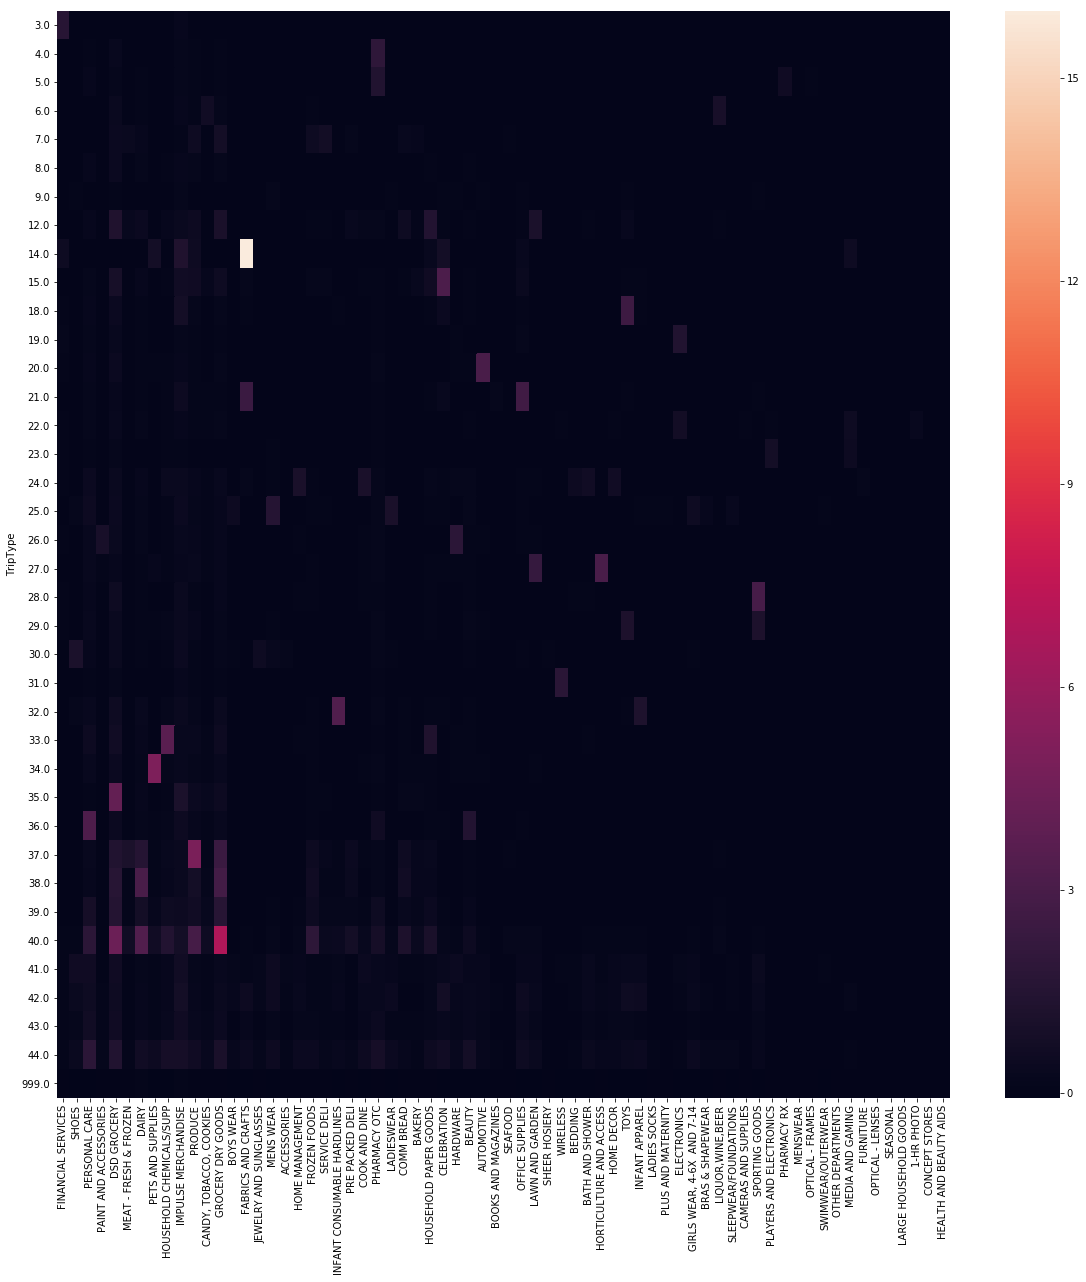

In [12]:
from seaborn import heatmap

%matplotlib inline

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
#heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)


heatmap(department_means_by_trip_type,
        annot=False,
        ax=ax)

### Algorithms and Techniques
In this section, you will need to discuss the algorithms and techniques you intend to use for solving the problem. You should justify the use of each one based on the characteristics of the problem and the problem domain. Questions to ask yourself when writing this section:
- _Are the algorithms you will use, including any default variables/parameters in the project clearly defined?_
- _Are the techniques to be used thoroughly discussed and justified?_
- _Is it made clear how the input data or datasets will be handled by the algorithms and techniques chosen?_

### Benchmark
In this section, you will need to provide a clearly defined benchmark result or threshold for comparing across performances obtained by your solution. The reasoning behind the benchmark (in the case where it is not an established result) should be discussed. Questions to ask yourself when writing this section:
- _Has some result or value been provided that acts as a benchmark for measuring performance?_
- _Is it clear how this result or value was obtained (whether by data or by hypothesis)?_

In [15]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
classes = lb.fit_transform(by_visit['TripType'])

by_visit_full = by_visit.copy()
by_visit.drop('TripType', axis=1, inplace=True)

In [18]:
by_visit.columns

Index([u'Weekday', u'FINANCIAL SERVICES', u'SHOES', u'PERSONAL CARE',
       u'PAINT AND ACCESSORIES', u'DSD GROCERY', u'MEAT - FRESH & FROZEN',
       u'DAIRY', u'PETS AND SUPPLIES', u'HOUSEHOLD CHEMICALS/SUPP',
       u'IMPULSE MERCHANDISE', u'PRODUCE', u'CANDY, TOBACCO, COOKIES',
       u'GROCERY DRY GOODS', u'BOYS WEAR', u'FABRICS AND CRAFTS',
       u'JEWELRY AND SUNGLASSES', u'MENS WEAR', u'ACCESSORIES',
       u'HOME MANAGEMENT', u'FROZEN FOODS', u'SERVICE DELI',
       u'INFANT CONSUMABLE HARDLINES', u'PRE PACKED DELI', u'COOK AND DINE',
       u'PHARMACY OTC', u'LADIESWEAR', u'COMM BREAD', u'BAKERY',
       u'HOUSEHOLD PAPER GOODS', u'CELEBRATION', u'HARDWARE', u'BEAUTY',
       u'AUTOMOTIVE', u'BOOKS AND MAGAZINES', u'SEAFOOD', u'OFFICE SUPPLIES',
       u'LAWN AND GARDEN', u'SHEER HOSIERY', u'WIRELESS', u'BEDDING',
       u'BATH AND SHOWER', u'HORTICULTURE AND ACCESS', u'HOME DECOR', u'TOYS',
       u'INFANT APPAREL', u'LADIES SOCKS', u'PLUS AND MATERNITY',
       u'ELECTRON

## III. Methodology
_(approx. 3-5 pages)_

### Data Preprocessing
In this section, all of your preprocessing steps will need to be clearly documented, if any were necessary. From the previous section, any of the abnormalities or characteristics that you identified about the dataset will be addressed and corrected here. Questions to ask yourself when writing this section:
- _If the algorithms chosen require preprocessing steps like feature selection or feature transformations, have they been properly documented?_
- _Based on the **Data Exploration** section, if there were abnormalities or characteristics that needed to be addressed, have they been properly corrected?_
- _If no preprocessing is needed, has it been made clear why?_

### Implementation
In this section, the process for which metrics, algorithms, and techniques that you implemented for the given data will need to be clearly documented. It should be abundantly clear how the implementation was carried out, and discussion should be made regarding any complications that occurred during this process. Questions to ask yourself when writing this section:
- _Is it made clear how the algorithms and techniques were implemented with the given datasets or input data?_
- _Were there any complications with the original metrics or techniques that required changing prior to acquiring a solution?_
- _Was there any part of the coding process (e.g., writing complicated functions) that should be documented?_

### Refinement
In this section, you will need to discuss the process of improvement you made upon the algorithms and techniques you used in your implementation. For example, adjusting parameters for certain models to acquire improved solutions would fall under the refinement category. Your initial and final solutions should be reported, as well as any significant intermediate results as necessary. Questions to ask yourself when writing this section:
- _Has an initial solution been found and clearly reported?_
- _Is the process of improvement clearly documented, such as what techniques were used?_
- _Are intermediate and final solutions clearly reported as the process is improved?_


## IV. Results
_(approx. 2-3 pages)_

### Model Evaluation and Validation
In this section, the final model and any supporting qualities should be evaluated in detail. It should be clear how the final model was derived and why this model was chosen. In addition, some type of analysis should be used to validate the robustness of this model and its solution, such as manipulating the input data or environment to see how the model’s solution is affected (this is called sensitivity analysis). Questions to ask yourself when writing this section:
- _Is the final model reasonable and aligning with solution expectations? Are the final parameters of the model appropriate?_
- _Has the final model been tested with various inputs to evaluate whether the model generalizes well to unseen data?_
- _Is the model robust enough for the problem? Do small perturbations (changes) in training data or the input space greatly affect the results?_
- _Can results found from the model be trusted?_

### Justification
In this section, your model’s final solution and its results should be compared to the benchmark you established earlier in the project using some type of statistical analysis. You should also justify whether these results and the solution are significant enough to have solved the problem posed in the project. Questions to ask yourself when writing this section:
- _Are the final results found stronger than the benchmark result reported earlier?_
- _Have you thoroughly analyzed and discussed the final solution?_
- _Is the final solution significant enough to have solved the problem?_



## V. Conclusion
_(approx. 1-2 pages)_

### Free-Form Visualization
In this section, you will need to provide some form of visualization that emphasizes an important quality about the project. It is much more free-form, but should reasonably support a significant result or characteristic about the problem that you want to discuss. Questions to ask yourself when writing this section:
- _Have you visualized a relevant or important quality about the problem, dataset, input data, or results?_
- _Is the visualization thoroughly analyzed and discussed?_
- _If a plot is provided, are the axes, title, and datum clearly defined?_

### Reflection
In this section, you will summarize the entire end-to-end problem solution and discuss one or two particular aspects of the project you found interesting or difficult. You are expected to reflect on the project as a whole to show that you have a firm understanding of the entire process employed in your work. Questions to ask yourself when writing this section:
- _Have you thoroughly summarized the entire process you used for this project?_
- _Were there any interesting aspects of the project?_
- _Were there any difficult aspects of the project?_
- _Does the final model and solution fit your expectations for the problem, and should it be used in a general setting to solve these types of problems?_

### Improvement
In this section, you will need to provide discussion as to how one aspect of the implementation you designed could be improved. As an example, consider ways your implementation can be made more general, and what would need to be modified. You do not need to make this improvement, but the potential solutions resulting from these changes are considered and compared/contrasted to your current solution. Questions to ask yourself when writing this section:
- _Are there further improvements that could be made on the algorithms or techniques you used in this project?_
- _Were there algorithms or techniques you researched that you did not know how to implement, but would consider using if you knew how?_
- _If you used your final solution as the new benchmark, do you think an even better solution exists?_


**Before submitting, ask yourself. . .**

- Does the project report you’ve written follow a well-organized structure similar to that of the project template?
- Is each section (particularly **Analysis** and **Methodology**) written in a clear, concise and specific fashion? Are there any ambiguous terms or phrases that need clarification?
- Would the intended audience of your project be able to understand your analysis, methods, and results?
- Have you properly proof-read your project report to assure there are minimal grammatical and spelling mistakes?
- Are all the resources used for this project correctly cited and referenced?
- Is the code that implements your solution easily readable and properly commented?
- Does the code execute without error and produce results similar to those reported?
